In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_formats = set(('retina', 'svg'))

In [ ]:
pl = pd.read_csv('/content/drive/MyDrive/MSc Project - Football Prediction/pl.csv')

In [ ]:
pl.columns

Index(['FTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY',
       'HR', 'AR', 'AvgH', 'AvgD', 'AvgA', 'MaxH', 'MaxD', 'MaxA', 'MW',
       'Year', 'Max>2.5', 'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'TGD', 'Prob_D',
       'Elo_Before_Home', 'Elo_Before_Away', 'Days_D', 'form_diff', 'SP_diff',
       'Overall_diff', 'Attack_diff', 'Midfield_diff', 'Defence_diff'],
      dtype='object')

In [ ]:
len(pl.columns)

36

# **Sorting out as Home and not home**

In [ ]:
# Define a custom function to apply the transformation
def create_wnw(row):
    if row['FTR'] == 'H':
        return 'H'
    elif row['FTR'] in ['A', 'D']:
        return 'NH'
    else:
        return None

In [ ]:
pl['WNW'] = pl.apply(create_wnw, axis=1)

In [ ]:
pl['WNW'].value_counts()

NH    2302
H     1878
Name: WNW, dtype: int64

In [ ]:
pl = pl.drop(columns=['FTR'])

# **Train-test-validation split of the dataset**

In [ ]:
!pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
  Created wheel for sklearn: filename=sklearn-0.0.post7-py3-none-any.whl size=2361 sha256=e5826438824f9a1a702fe06ff41804d6906c0ffc4fadc674adef7cf43ecdbd51
  Stored in directory: c:\users\22547960\appdata\local\pip\cache\wheels\ae\cd\c1\7044aa9eba19c0e761bd045ad4d91b9939538ed908b4d5d789
Successfully built sklearn


In [ ]:
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_formats = set(('retina', 'svg'))

In [ ]:
pl = pd.read_csv('C:/Users/ASUS/OneDrive - MMU/Downloads/pl.csv')


In [ ]:
pl = pl.loc[(pl['FTR']=='H') | (pl['FTR']=='A')]

In [ ]:
from sklearn.model_selection import train_test_split


X = pl.drop(columns=['FTR'])
y = pl['FTR']

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=42)

# **Hyperparmeter tuning individual models**

## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(multi_class='ovr', solver='liblinear')

### **scaling the data**

In [ ]:
norm_cols=['MW', 'Year','Overall_diff', 'Attack_diff',\
       'Midfield_diff', 'Defence_diff']

In [ ]:
std_cols = [col for col in X_train.columns if col not in norm_cols]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,Normalizer

In [ ]:
# Create transformers
stdscaling_transformer = StandardScaler()
normscaling_transformer = Normalizer()

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("std", stdscaling_transformer, std_cols),
        ("norm", normscaling_transformer, norm_cols)
    ],
    remainder='passthrough'
)

# Apply the transformations and convert back to a pandas DataFrame
X_train_scale = preprocessor.fit_transform(X_train)
X_train_scale = pd.DataFrame(X_train_scale, columns=std_cols + norm_cols)

In [ ]:
X_train_scale.head(5)

,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,...,Elo_Before_Away,Days_D,form_diff,SP_diff,MW,Year,Overall_diff,Attack_diff,Midfield_diff,Defence_diff
0,1.076889,-0.884041,0.629452,-0.844202,-0.445835,-1.340967,1.728802,-1.363751,-1.213270,-1.364168,...,-0.263236,0.096672,0.365047,1.177314,0.006951,0.999944,0.004468,0.003972,0.002979,0.004468
1,-0.354754,0.342697,0.629452,-0.056537,0.442787,-0.197848,-0.573957,0.110711,1.233651,-0.565926,...,1.257670,0.007231,-0.916341,-1.756945,0.008420,0.999947,-0.002476,-0.004457,-0.001981,-0.002476
2,-1.249532,1.978349,-0.728953,3.094119,-1.038250,0.373712,-1.231889,-0.257904,-1.213270,-0.565926,...,0.280108,0.096672,0.030564,0.003610,0.002981,0.999975,-0.002484,-0.003477,-0.003974,-0.002484
3,0.003156,-0.884041,0.289851,-0.056537,-0.445835,0.659492,-0.244992,1.216558,-0.397630,1.828799,...,0.234011,0.186113,-0.146502,0.003610,0.005464,0.999984,0.000000,0.000000,-0.000994,0.000497
4,-0.891621,-0.884041,-1.068554,-0.844202,-1.334458,0.087932,-0.573957,-0.626520,-0.397630,1.030557,...,0.332989,-0.171652,-0.153809,-0.583242,0.008910,0.999955,0.001485,0.001980,0.001980,0.000990


In [ ]:
X_val_scale = preprocessor.fit_transform(X_val)
X_val_scale = pd.DataFrame(X_val_scale, columns=std_cols + norm_cols)

X_val_scale.head(5)

,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,...,Elo_Before_Away,Days_D,form_diff,SP_diff,MW,Year,Overall_diff,Attack_diff,Midfield_diff,Defence_diff
0,-1.219631,0.310567,-1.070002,1.067193,1.461710,0.278484,-0.556609,1.877360,1.226440,0.195149,...,-0.636771,0.031127,-0.387001,-0.803081,0.012915,0.999916,0.000497,-0.000497,-0.000993,-0.000497
1,-0.864716,-0.280127,-1.773244,-0.094744,0.563953,0.816502,1.365197,-1.005678,0.420899,1.019289,...,0.100577,0.031127,0.023050,0.384307,0.004946,0.999983,-0.000495,0.001484,-0.001978,-0.001484
2,-1.042173,0.113669,-0.718381,0.679881,0.563953,0.547493,0.404294,0.796221,1.226440,1.843429,...,0.171171,0.031127,-0.064818,-1.990470,0.000992,0.999985,-0.002479,-0.002975,-0.002975,-0.002479
3,0.022573,0.901261,1.039725,0.292569,0.863205,1.354519,0.083993,0.435841,0.420899,1.019289,...,0.253941,0.031127,-0.136641,-0.605183,0.004460,0.999962,0.003469,0.003964,0.004460,0.002973
4,1.619692,-1.264617,0.336483,-0.869368,-0.333804,-0.259533,2.326100,-1.726438,-1.190183,0.195149,...,0.235121,0.119492,-0.023431,-0.258862,0.002472,0.999989,0.001977,0.002472,0.000494,0.002472


### **Fitting a simple model**

In [ ]:
lgc = LogisticRegression(multi_class='ovr', solver='liblinear')

In [ ]:
lgc.fit(X_train_scale,y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [ ]:
from sklearn.metrics import classification_report

y_pred_lg = lgc.predict(X_val_scale)
class_report_lg = classification_report(y_val, y_pred_lg)
print("\nClassification Report:")
print(class_report_lg)


Classification Report:
              precision    recall  f1-score   support

           A       0.86      0.74      0.79       209
           H       0.83      0.91      0.87       302

    accuracy                           0.84       511
   macro avg       0.84      0.83      0.83       511
weighted avg       0.84      0.84      0.84       511



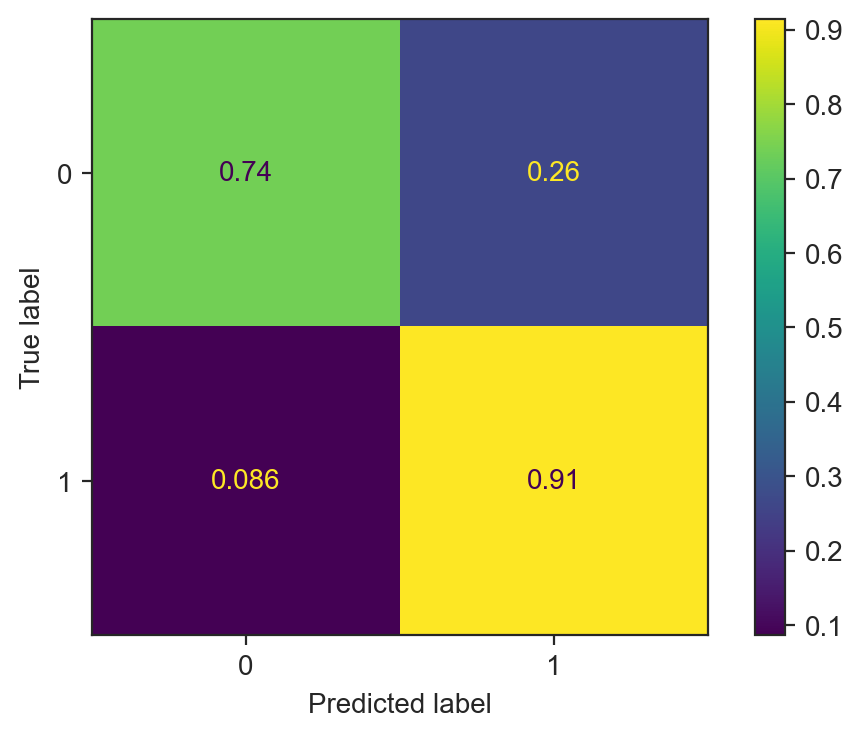

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,lgc.predict(X_val_scale),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
from sklearn.metrics import accuracy_score

y_val_pred = lgc.predict(X_val_scale)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.8414872798434442

### **Sequential feature selection**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector

# Create a StratifiedKFold cross-validation object
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize your Logistic Regression model
lgc = LogisticRegression(multi_class='ovr', solver='liblinear')

# Initialize the Sequential Feature Selector
sfs = SequentialFeatureSelector(lgc,
                                k_features='best',  # Select the best subset of features
                                forward=True,        # Forward selection (you can also try backward=False)
                                scoring='accuracy',  # Use accuracy as the evaluation metric
                                cv=kfold)

# Fit the SFS to your training data
sfs.fit(X_train_scale, y_train)

# Get the selected feature indices
selected_features_indices = np.array(sfs.k_feature_idx_)

# Get the names of the selected features
selected_feature_names = X_train_scale.columns[selected_features_indices]

# Select the features from your training data
X_train_selected = X_train_scale[selected_feature_names]

# Train your Logistic Regression model on the selected features
lgc.fit(X_train_selected, y_train)

# Print the selected feature names
print("Selected feature names:", selected_feature_names)


Selected feature names: Index(['HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'AY', 'HR', 'AR',
       'AvgH', 'AvgD', 'AvgA', 'MaxH', 'MaxD', 'MaxA', 'Max>2.5', 'Max<2.5',
       'Avg>2.5', 'TGD', 'Prob_D', 'Elo_Before_Home', 'Elo_Before_Away',
       'Days_D', 'form_diff', 'SP_diff', 'MW', 'Year', 'Overall_diff',
       'Attack_diff', 'Midfield_diff', 'Defence_diff'],
      dtype='object')


In [ ]:

# evaluate the model on your validation or test set
X_val_selected = X_val_scale[selected_feature_names]
y_val_pred = lgc.predict(X_val_selected)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.8297455968688845

### **gridsearchCV**

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import  make_scorer,f1_score,precision_score,recall_score


param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'class_weight': ['balanced', None]
}


lg = LogisticRegression(multi_class='ovr', solver='liblinear')

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store cross-validation results
cv_scores = []

# Iterate over the cross-validation folds
for train_idx, val_idx in kfold.split(X_train_selected, y_train):
    # Split the training data into training and validation sets for the fold
    X_train_fold, X_val_fold = X_train_selected.iloc[train_idx], X_train_selected.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]


smote = SMOTE(sampling_strategy='auto', random_state=42)

scorer = make_scorer(f1_score, average='weighted')

grid_search = GridSearchCV(estimator=lg, param_grid=param_grid, scoring=scorer, cv=kfold,return_train_score=True)

X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)

grid_search.fit(X_train_fold_resampled, y_train_fold_resampled)


best_estimator = grid_search.best_estimator_

In [ ]:
y_val_fold.value_counts()

H    241
A    167
Name: FTR, dtype: int64

In [ ]:
y_train.value_counts()

H    1208
A     833
Name: FTR, dtype: int64

In [ ]:
y_train_fold_resampled.value_counts()

H    967
A    967
Name: FTR, dtype: int64

In [ ]:
grid_search.best_score_

0.8086379987593283

In [ ]:
grid_search.best_params_

{'C': 10, 'class_weight': 'balanced', 'penalty': 'l2'}

In [ ]:
grid_search.best_index_

17

In [ ]:
lg_results = pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score')

In [ ]:
lg_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_class_weight', 'param_penalty', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [ ]:
lg_results[['param_C', 'param_class_weight', 'param_penalty','mean_train_score','mean_test_score','rank_test_score']]

,param_C,param_class_weight,param_penalty,mean_train_score,mean_test_score,rank_test_score
19,10,None,l2,0.810364,0.808638,1
17,10,balanced,l2,0.810364,0.808638,1
14,1,None,l1,0.809587,0.807603,3
12,1,balanced,l1,0.809329,0.807603,3
11,0.1,None,l2,0.810228,0.807596,5
9,0.1,balanced,l2,0.810099,0.807596,5
13,1,balanced,l2,0.810104,0.806575,7
15,1,None,l2,0.810104,0.806575,7
8,0.1,balanced,l1,0.808251,0.804973,9
10,0.1,None,l1,0.808508,0.804973,9


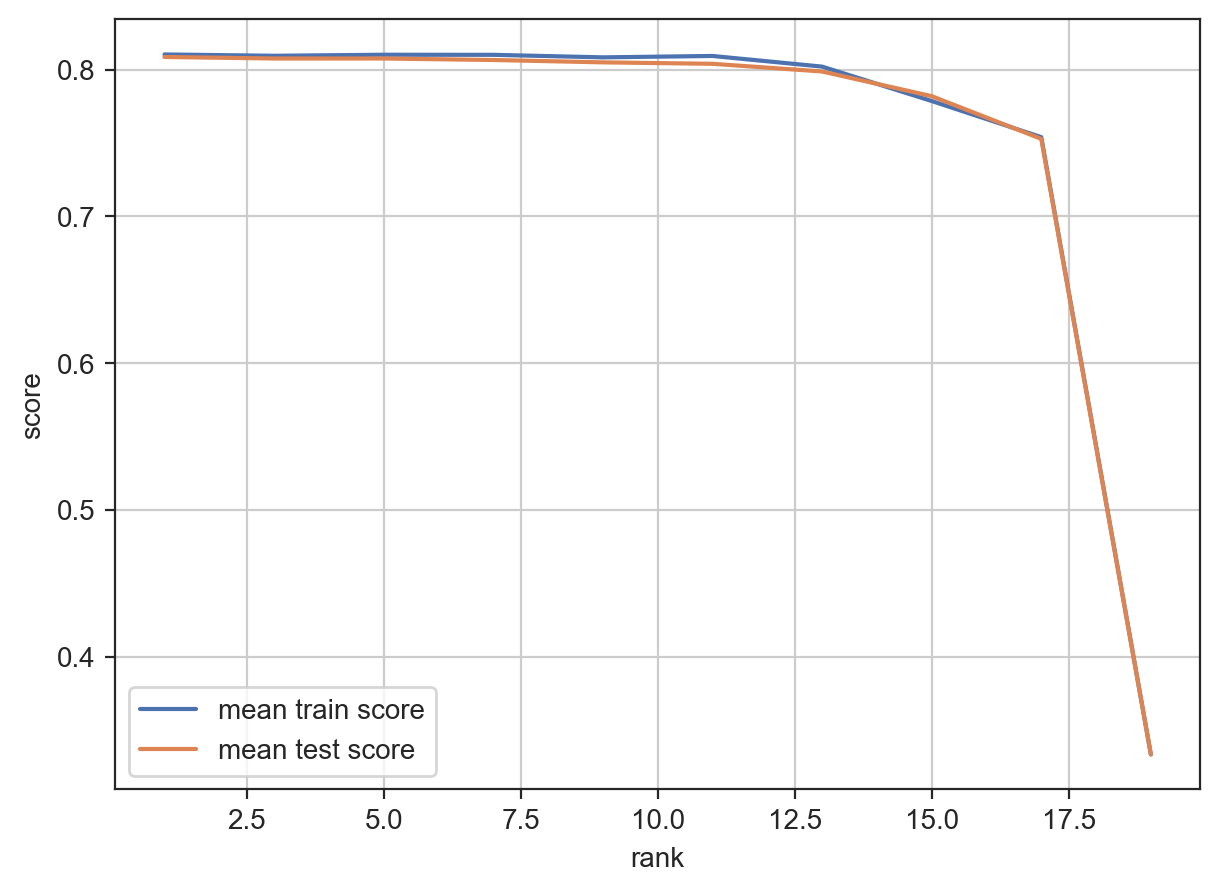

In [ ]:
fig,ax = plt.subplots(figsize=(7,5))
sns.lineplot(data=lg_results,x='rank_test_score',y='mean_train_score',ax=ax,ci=None)
sns.lineplot(data=lg_results,x='rank_test_score',y='mean_test_score',ax=ax,ci=None)
ax.legend(['mean train score','mean test score'])
ax.set_xlabel('rank')
ax.set_ylabel('score')
plt.grid(visible=True)

In [ ]:
winning_lgc = grid_search.best_estimator_

In [ ]:
from sklearn.metrics import classification_report

y_pred_lg = winning_lgc.predict(X_val_selected)
class_report_lg = classification_report(y_val, y_pred_lg)
print("\nClassification Report:")
print(class_report_lg)


Classification Report:
              precision    recall  f1-score   support

           A       0.80      0.81      0.81       209
           H       0.87      0.86      0.87       302

    accuracy                           0.84       511
   macro avg       0.84      0.84      0.84       511
weighted avg       0.84      0.84      0.84       511



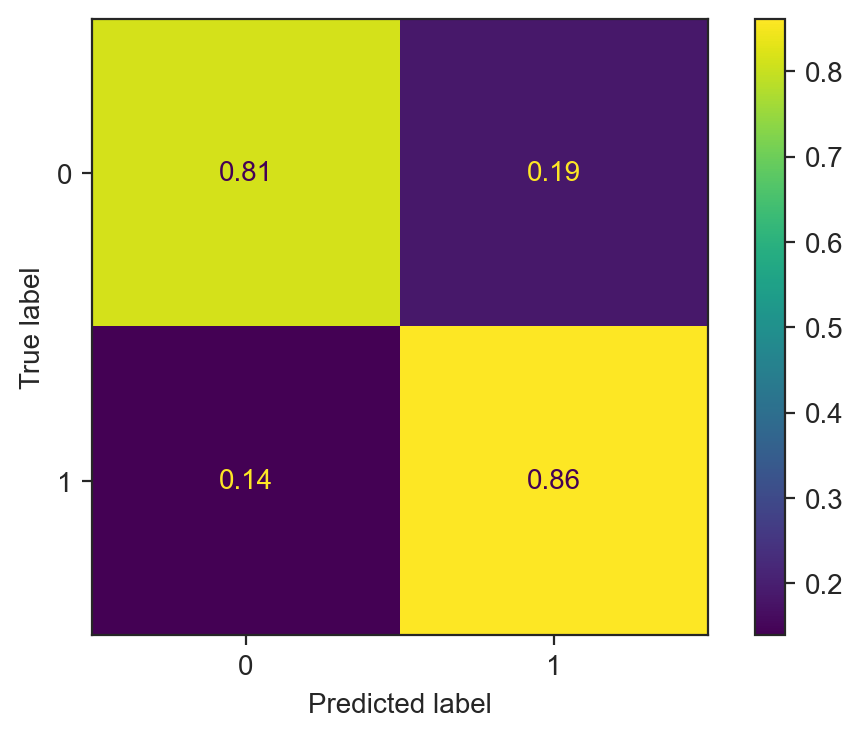

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,winning_lgc.predict(X_val_selected),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
# evaluate the model on your validation or test set
X_val_selected = X_val_scale[selected_feature_names]
y_val_pred = winning_lgc.predict(X_val_selected)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.8414872798434442

## **RandomForest Classifier**

### **Fitting a simple model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred_rfc = rfc.predict(X_val)
class_report_rfc = classification_report(y_val, y_pred_rfc)
print("\nClassification Report:")
print(class_report_rfc)


Classification Report:
              precision    recall  f1-score   support

           A       0.80      0.72      0.76       209
           H       0.82      0.87      0.85       302

    accuracy                           0.81       511
   macro avg       0.81      0.80      0.80       511
weighted avg       0.81      0.81      0.81       511



In [ ]:
from sklearn.metrics import accuracy_score

y_val_pred = rfc.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.812133072407045

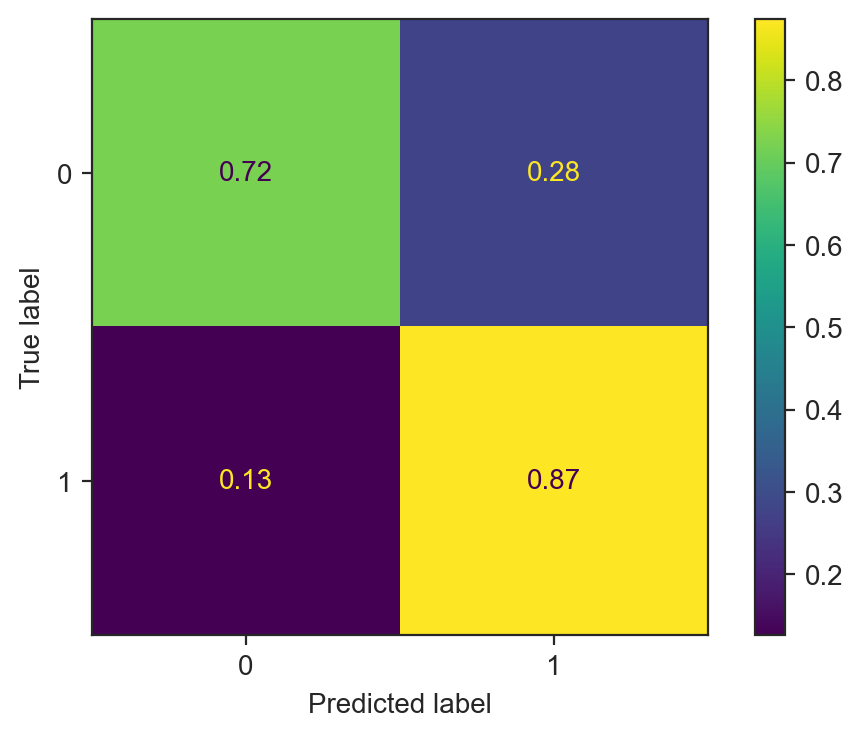

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,rfc.predict(X_val),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### **Sequential feature selection**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector

# Create a StratifiedKFold cross-validation object
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Random Forest model
rfc = RandomForestClassifier()

# Initialize the Sequential Feature Selector
sfs = SequentialFeatureSelector(rfc,
                                k_features='best',  # Select the best subset of features
                                forward=True,        # Forward selection (you can also try backward=False)
                                scoring='accuracy',  # Use accuracy as the evaluation metric
                                cv=kfold)

# Fit the rfc to your training data
sfs.fit(X_train, y_train)

# Get the selected feature indices
selected_features_indices = np.array(sfs.k_feature_idx_)

# Get the names of the selected features
selected_feature_names = X_train.columns[selected_features_indices]

# Select the features from your training data
X_train_selected = X_train[selected_feature_names]

# Train your Logistic Regression model on the selected features
rfc.fit(X_train_selected, y_train)

# Print the selected feature names
print("Selected feature names:", selected_feature_names)


Selected feature names: Index(['HS', 'AS', 'HST', 'AST', 'HF', 'HC', 'AC', 'AY', 'HR', 'AR', 'AvgA',
       'MaxA', 'Max>2.5', 'TGD'],
      dtype='object')


In [ ]:

# evaluate the model on your validation or test set
X_val_selected = X_val[selected_feature_names]
y_val_pred = rfc.predict(X_val_selected)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.8199608610567515

### **gridsearchCV**

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import  make_scorer,f1_score,precision_score,recall_score


param_grid = {
    'n_estimators': [5,10,50,100],
    'max_depth': [3,5,8,10,20],
    'min_samples_split': [2,5,8,10,20],
    'min_samples_leaf':[2,5,10,20],
    'n_jobs':[-1],
    'random_state':[42]
}


rfc = RandomForestClassifier()

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store cross-validation results
cv_scores = []

# Iterate over the cross-validation folds
for train_idx, val_idx in kfold.split(X_train_selected, y_train):
    # Split the training data into training and validation sets for the fold
    X_train_fold, X_val_fold = X_train_selected.iloc[train_idx], X_train_selected.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]


smote = SMOTE(sampling_strategy='auto', random_state=42)

scorer = make_scorer(f1_score, average='weighted')

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring=scorer, cv=kfold, return_train_score=True)

X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)

grid_search.fit(X_train_fold_resampled, y_train_fold_resampled)


best_estimator = grid_search.best_estimator_

In [ ]:
y_val_fold.value_counts()

H    241
A    167
Name: FTR, dtype: int64

In [ ]:
y_train.value_counts()

H    1208
A     833
Name: FTR, dtype: int64

In [ ]:
y_train_fold_resampled.value_counts()

H    967
A    967
Name: FTR, dtype: int64

In [ ]:
grid_search.best_score_

0.8168733946494358

In [ ]:
grid_search.best_params_

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100,
 'n_jobs': -1,
 'random_state': 42}

In [ ]:
grid_search.best_index_

243

In [ ]:
rfc_results = pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score')

In [ ]:
rfc_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators', 'param_n_jobs', 'param_random_state', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [ ]:
rfc_results[['param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split','param_n_estimators','mean_train_score','mean_test_score','rank_test_score']]

,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score,rank_test_score
243,10,2,2,100,0.964969,0.816873,1
323,20,2,2,100,0.988107,0.815379,2
331,20,2,8,100,0.962900,0.815333,3
242,10,2,2,50,0.961091,0.814307,4
327,20,2,5,100,0.983971,0.814299,5
...,...,...,...,...,...,...,...
66,3,20,5,50,0.773903,0.753684,396
70,3,20,8,50,0.773903,0.753684,396
78,3,20,20,50,0.773903,0.753684,396
74,3,20,10,50,0.773903,0.753684,396


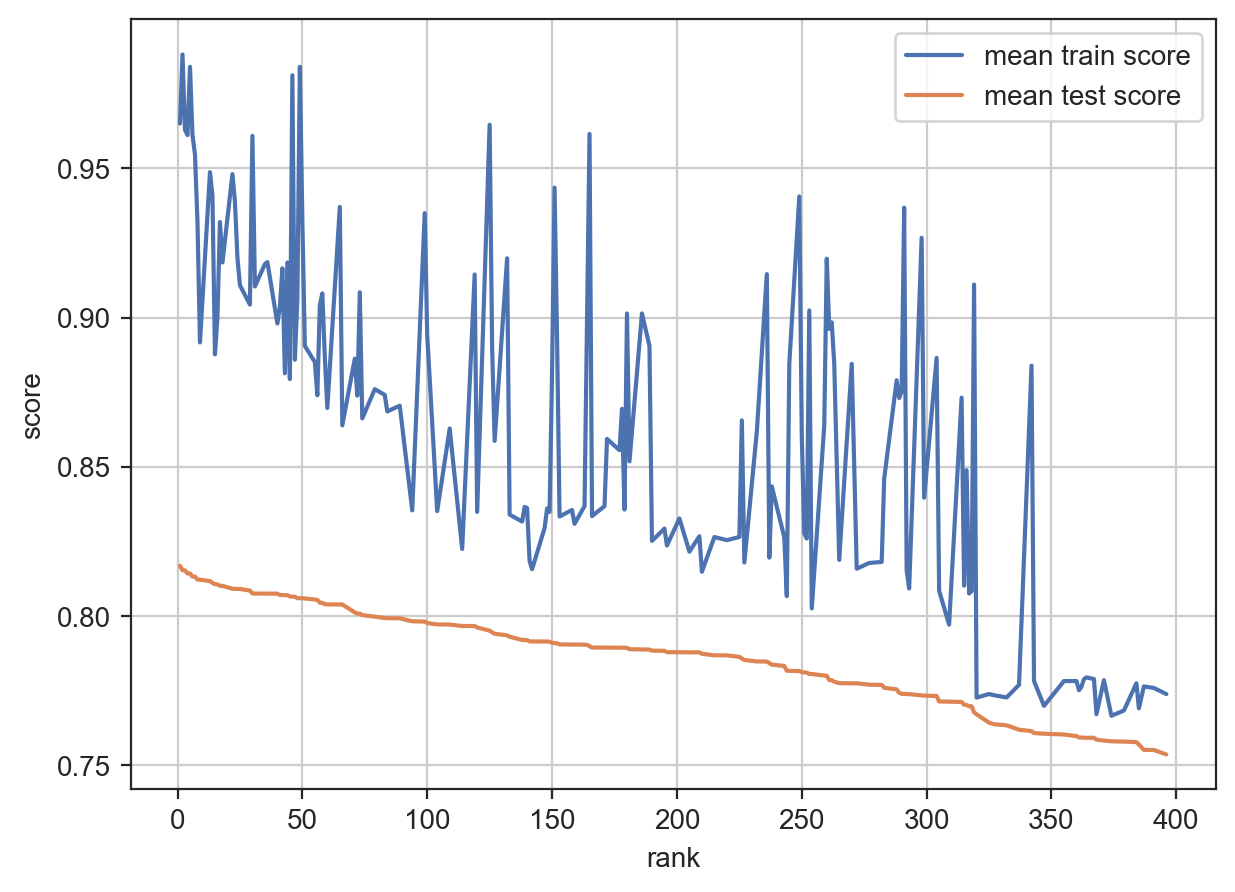

In [ ]:
fig,ax = plt.subplots(figsize=(7,5))
sns.lineplot(data=rfc_results,x='rank_test_score',y='mean_train_score',ax=ax,ci=None)
sns.lineplot(data=rfc_results,x='rank_test_score',y='mean_test_score',ax=ax,ci=None)
ax.legend(['mean train score','mean test score'])
ax.set_xlabel('rank')
ax.set_ylabel('score')
plt.grid(visible=True)

In [ ]:
winning_rfc = grid_search.best_estimator_

In [ ]:
winning_rfc

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_jobs=-1,
                       random_state=42)

In [ ]:
from sklearn.metrics import classification_report

y_pred_lg = winning_rfc.predict(X_val_selected)
class_report_lg = classification_report(y_val, y_pred_lg)
print("\nClassification Report:")
print(class_report_lg)


Classification Report:
              precision    recall  f1-score   support

           A       0.75      0.76      0.75       209
           H       0.83      0.83      0.83       302

    accuracy                           0.80       511
   macro avg       0.79      0.79      0.79       511
weighted avg       0.80      0.80      0.80       511



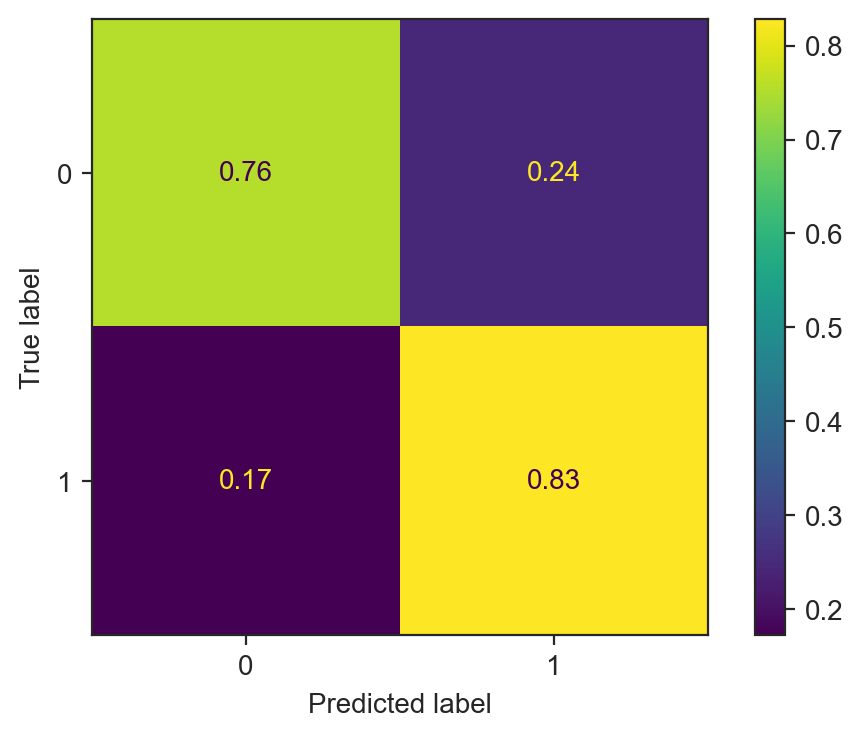

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,winning_rfc.predict(X_val_selected),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
# evaluate the model on your validation or test set
X_val_selected = X_val[selected_feature_names]
y_val_pred = winning_rfc.predict(X_val_selected)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.7984344422700587

In [ ]:
rfc_results['diff']=abs(rfc_results['mean_train_score']-rfc_results['mean_test_score'])

sorted_table = rfc_results[['param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',\
                            'param_n_estimators','mean_train_score','mean_test_score','diff','rank_test_score']]\
                            .sort_values(by=['diff', 'mean_test_score'], ascending=[True, False])
sorted_table

,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score,diff,rank_test_score
69,3,20,8,10,0.772722,0.767121,0.005601,320
61,3,20,2,10,0.772722,0.767121,0.005601,320
65,3,20,5,10,0.772722,0.767121,0.005601,320
73,3,20,10,10,0.772722,0.767121,0.005601,320
77,3,20,20,10,0.772722,0.767121,0.005601,320
...,...,...,...,...,...,...,...,...
327,20,2,5,100,0.983971,0.814299,0.169672,5
325,20,2,5,10,0.961478,0.789947,0.171531,165
323,20,2,2,100,0.988107,0.815379,0.172728,2
326,20,2,5,50,0.981127,0.806556,0.174571,46


In [ ]:
# X_train_selected = X_train[['HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HY', 'HR', 'AR', 'AvgH', 'MaxA',\
#        'MW', 'Max<2.5', 'Days_D', 'Attack_diff']]

# X_val_selected = X_val[['HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HY', 'HR', 'AR', 'AvgH', 'MaxA',\
#        'MW', 'Max<2.5', 'Days_D', 'Attack_diff']]

In [ ]:
# Select the top model (small gap and high test score)
first_model = sorted_table.iloc[0]

# Display the first model's information
print("first Model:")
print(first_model)

first Model:
param_max_depth                   3
param_min_samples_leaf           20
param_min_samples_split           8
param_n_estimators               10
mean_train_score           0.772722
mean_test_score            0.767121
diff                       0.005601
rank_test_score                 320
Name: 69, dtype: object


In [ ]:
# # Define hyperparameters for the first model (adjust these values based on your first model)
# first_model_hyperparameters = {
#     'max_depth': 3,
#     'min_samples_leaf': 20,
#     'min_samples_split': 8,
#     'n_estimators': 5
# }

# # Create a new instance of the RandomForestClassifier with the first model's hyperparameters
# first_rfc = RandomForestClassifier(**first_model_hyperparameters)

# kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # Iterate over the cross-validation folds
# for train_idx, val_idx in kfold.split(X_train_selected, y_train):
#     # Split the training data into training and validation sets for the fold
#     X_train_fold, X_val_fold = X_train_selected.iloc[train_idx], X_train_selected.iloc[val_idx]
#     y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]


# smote = SMOTE(sampling_strategy='auto', random_state=42)

# X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)

# first_rfc.fit(X_train_fold_resampled, y_train_fold_resampled)

# y_val_pred = first_rfc.predict(X_val_selected)

# # Calculate the validation accuracy
# val_accuracy = accuracy_score(y_val, y_val_pred)

# # Print the validation accuracy
# print("Validation Accuracy:", val_accuracy)


In [ ]:
# from sklearn.metrics import classification_report

# y_pred_rfc = first_rfc.predict(X_val_selected)
# class_report_rfc = classification_report(y_val, y_pred_rfc, zero_division='warn')
# print("\nClassification Report:")
# print(class_report_rfc)


In [ ]:
# from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# cm=confusion_matrix(y_val,first_rfc.predict(X_val_selected),normalize='true')
# ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
# # Calculate the index of the middle row
# middle_index = len(sorted_table) // 2

# # Select the model from the middle
# middle_model = sorted_table.iloc[middle_index]
# middle_model

In [ ]:
# # Define hyperparameters for the middle model (adjust these values based on your middle model)
# middle_model_hyperparameters = {
#     'max_depth': 20,
#     'min_samples_leaf': 20,
#     'min_samples_split': 10,
#     'n_estimators': 10
# }

# # Create a new instance of the RandomForestClassifier with the middle model's hyperparameters
# middle_rfc = RandomForestClassifier(**middle_model_hyperparameters)

# # Fit the model to your training data
# middle_rfc.fit(X_train_selected, y_train)

# # Use the middle model estimator to make predictions
# X_val_selected = X_val[selected_feature_names]
# y_val_pred = middle_rfc.predict(X_val_selected)

# # Calculate the validation accuracy
# val_accuracy = accuracy_score(y_val, y_val_pred)

# # Print the validation accuracy
# print("Validation Accuracy:", val_accuracy)


In [ ]:
# from sklearn.metrics import classification_report

# y_pred_lg = middle_rfc.predict(X_val_selected)
# class_report_lg = classification_report(y_val, y_pred_lg)
# print("\nClassification Report:")
# print(class_report_lg)

## **HistGradientBoosting classifier**

### **Fitting a simple model**

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [ ]:
hgc = HistGradientBoostingClassifier()

In [ ]:
hgc.fit(X_train,y_train)

HistGradientBoostingClassifier()

In [ ]:
from sklearn.metrics import classification_report

y_pred_hgc = hgc.predict(X_val)
class_report_hgc = classification_report(y_val, y_pred_hgc)
print("\nClassification Report:")
print(class_report_hgc)


Classification Report:
              precision    recall  f1-score   support

           A       0.77      0.71      0.74       209
           H       0.81      0.85      0.83       302

    accuracy                           0.79       511
   macro avg       0.79      0.78      0.78       511
weighted avg       0.79      0.79      0.79       511



In [ ]:
from sklearn.metrics import accuracy_score

y_val_pred = hgc.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.7925636007827789

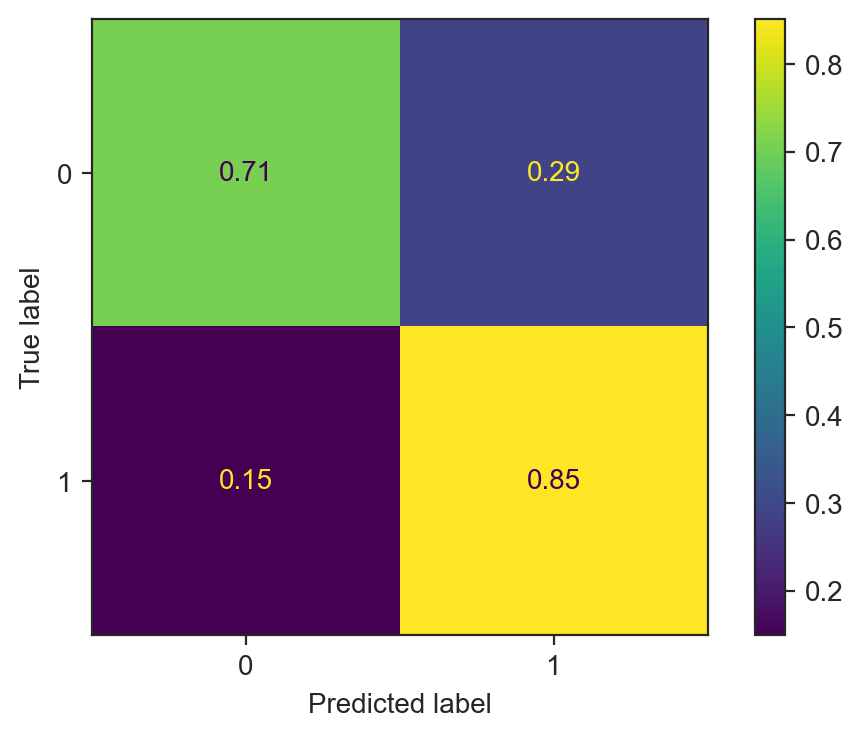

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,hgc.predict(X_val),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### **Sequential feature selection**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector

# Create a StratifiedKFold cross-validation object
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Random Forest model
hgc = HistGradientBoostingClassifier()

# Initialize the Sequential Feature Selector
sfs = SequentialFeatureSelector(hgc,
                                k_features='best',  # Select the best subset of features
                                forward=True,        # Forward selection (you can also try backward=False)
                                scoring='accuracy',  # Use accuracy as the evaluation metric
                                cv=kfold)

# Fit the hgc to your training data
sfs.fit(X_train, y_train)

# Get the selected feature indices
selected_features_indices = np.array(sfs.k_feature_idx_)

# Get the names of the selected features
selected_feature_names = X_train.columns[selected_features_indices]

# Select the features from your training data
X_train_selected = X_train[selected_feature_names]

# Train your Logistic Regression model on the selected features
hgc.fit(X_train_selected, y_train)

# Print the selected feature names
print("Selected feature names:", selected_feature_names)


Selected feature names: Index(['HS', 'AS', 'HST', 'AST', 'AF', 'HC', 'AC', 'HR', 'AR', 'AvgA', 'MaxH',
       'MW', 'Days_D', 'Attack_diff'],
      dtype='object')


In [ ]:

# evaluate the model on your validation or test set
X_val_selected = X_val[selected_feature_names]
y_val_pred = hgc.predict(X_val_selected)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.8003913894324853

In [ ]:
X_train_selected = X_train[selected_feature_names]

In [ ]:
X_train_selected.columns

Index(['HS', 'AS', 'HST', 'AST', 'AF', 'HC', 'AC', 'HR', 'AR', 'AvgA', 'MaxH',
       'MW', 'Days_D', 'Attack_diff'],
      dtype='object')

In [ ]:
X_val_selected = X_val[selected_feature_names]
X_val_selected.columns

Index(['HS', 'AS', 'HST', 'AST', 'AF', 'HC', 'AC', 'HR', 'AR', 'AvgA', 'MaxH',
       'MW', 'Days_D', 'Attack_diff'],
      dtype='object')

### **gridsearchCV**

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import  make_scorer,f1_score,precision_score,recall_score


param_grid = {
    'max_iter': [50,100,200],
    'max_depth': [3,5,8,10,20],
    'max_leaf_nodes': [20, 50, 100, 200],
    'min_samples_leaf':[2,5,10,20],
    'random_state':[42],
    'learning_rate': [0.1, 0.5],
    'l2_regularization': [0,0.1,0.01]

}


hgc = HistGradientBoostingClassifier()

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store cross-validation results
cv_scores = []

# Iterate over the cross-validation folds
for train_idx, val_idx in kfold.split(X_train_selected, y_train):
    # Split the training data into training and validation sets for the fold
    X_train_fold, X_val_fold = X_train_selected.iloc[train_idx], X_train_selected.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]


smote = SMOTE(sampling_strategy='auto', random_state=42)

scorer = make_scorer(f1_score, average='weighted')

grid_search = GridSearchCV(estimator=hgc, param_grid=param_grid, scoring=scorer, cv=kfold, return_train_score=True)

X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)

grid_search.fit(X_train_fold_resampled, y_train_fold_resampled)


best_estimator = grid_search.best_estimator_

In [ ]:
y_val_fold.value_counts()

H    241
A    167
Name: FTR, dtype: int64

In [ ]:
y_train.value_counts()

H    1208
A     833
Name: FTR, dtype: int64

In [ ]:
y_train_fold_resampled.value_counts()

H    967
A    967
Name: FTR, dtype: int64

In [ ]:
grid_search.best_score_

0.8334025710477801

In [ ]:
grid_search.best_params_

{'l2_regularization': 0,
 'learning_rate': 0.1,
 'max_depth': 5,
 'max_iter': 200,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 5,
 'random_state': 42}

In [ ]:
grid_search.best_index_

81

In [ ]:
hgb_results = pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score')

In [ ]:
hgb_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_l2_regularization', 'param_learning_rate', 'param_max_depth',
       'param_max_iter', 'param_max_leaf_nodes', 'param_min_samples_leaf',
       'param_random_state', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [ ]:
hgb_results[['param_max_iter', 'param_max_depth', 'param_max_leaf_nodes','param_min_samples_leaf','param_learning_rate','param_l2_regularization','mean_train_score','mean_test_score','rank_test_score']]

,param_max_iter,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_learning_rate,param_l2_regularization,mean_train_score,mean_test_score,rank_test_score
81,200,5,20,5,0.1,0,0.994312,0.833403,1
136,200,8,100,2,0.1,0,1.000000,0.832449,2
699,100,20,100,20,0.1,0.1,1.000000,0.831935,3
703,100,20,200,20,0.1,0.1,1.000000,0.831935,3
1151,200,10,200,20,0.1,0.01,1.000000,0.831893,5
...,...,...,...,...,...,...,...,...,...
260,100,3,50,2,0.5,0,0.990693,0.802844,1433
220,100,20,200,2,0.1,0,1.000000,0.801392,1437
684,50,20,200,2,0.1,0.1,1.000000,0.800877,1438
1164,50,20,200,2,0.1,0.01,1.000000,0.790508,1439


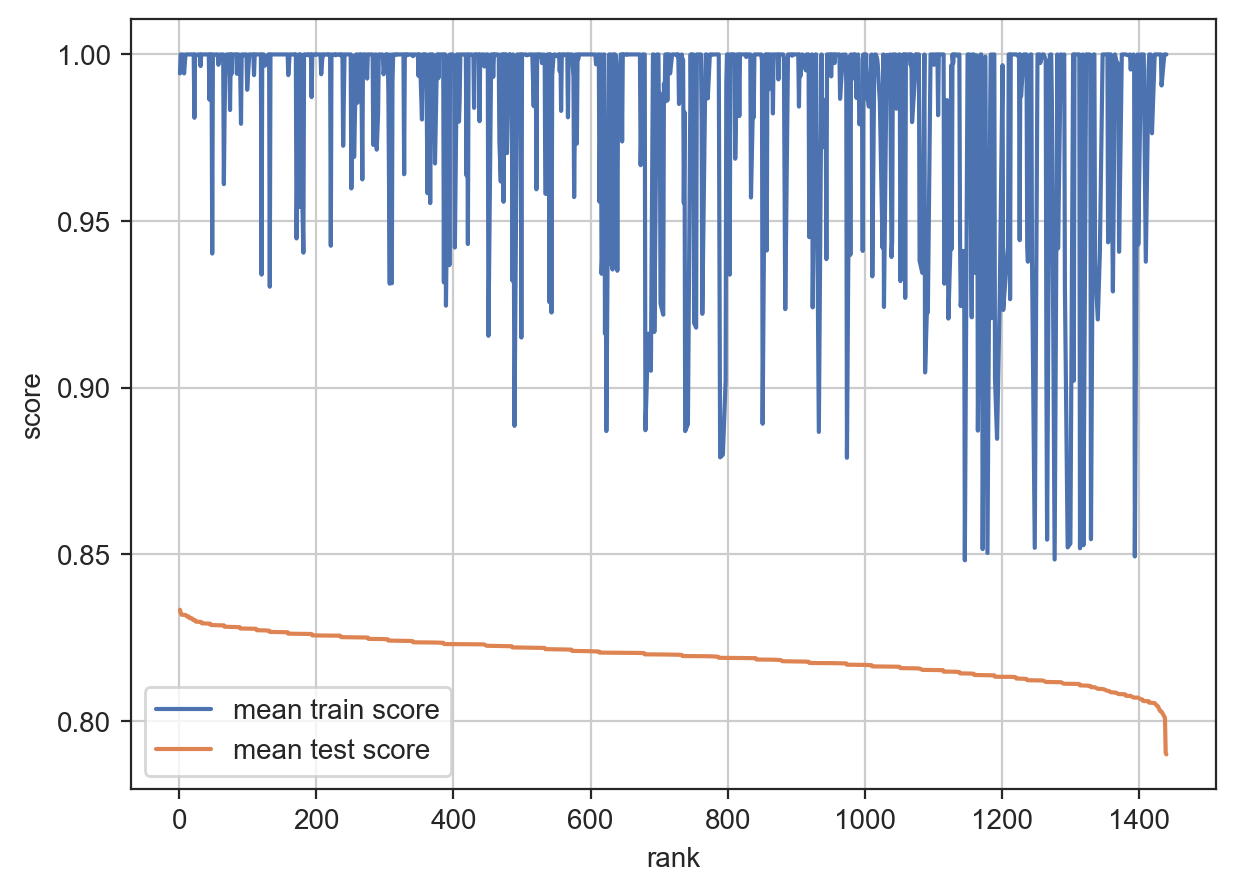

In [ ]:
fig,ax = plt.subplots(figsize=(7,5))
sns.lineplot(data=hgb_results,x='rank_test_score',y='mean_train_score',ax=ax,ci=None)
sns.lineplot(data=hgb_results,x='rank_test_score',y='mean_test_score',ax=ax,ci=None)
ax.legend(['mean train score','mean test score'])
ax.set_xlabel('rank')
ax.set_ylabel('score')
plt.grid(visible=True)

In [ ]:
winning_hgb = grid_search.best_estimator_

In [ ]:
winning_hgb

HistGradientBoostingClassifier(l2_regularization=0, max_depth=5, max_iter=200,
                               max_leaf_nodes=20, min_samples_leaf=5,
                               random_state=42)

In [ ]:
from sklearn.metrics import classification_report

y_pred_hgb = winning_hgb.predict(X_val_selected)
class_report_hgb = classification_report(y_val, y_pred_hgb)
print("\nClassification Report:")
print(class_report_hgb)


Classification Report:
              precision    recall  f1-score   support

           A       0.75      0.70      0.73       209
           H       0.80      0.84      0.82       302

    accuracy                           0.78       511
   macro avg       0.78      0.77      0.77       511
weighted avg       0.78      0.78      0.78       511



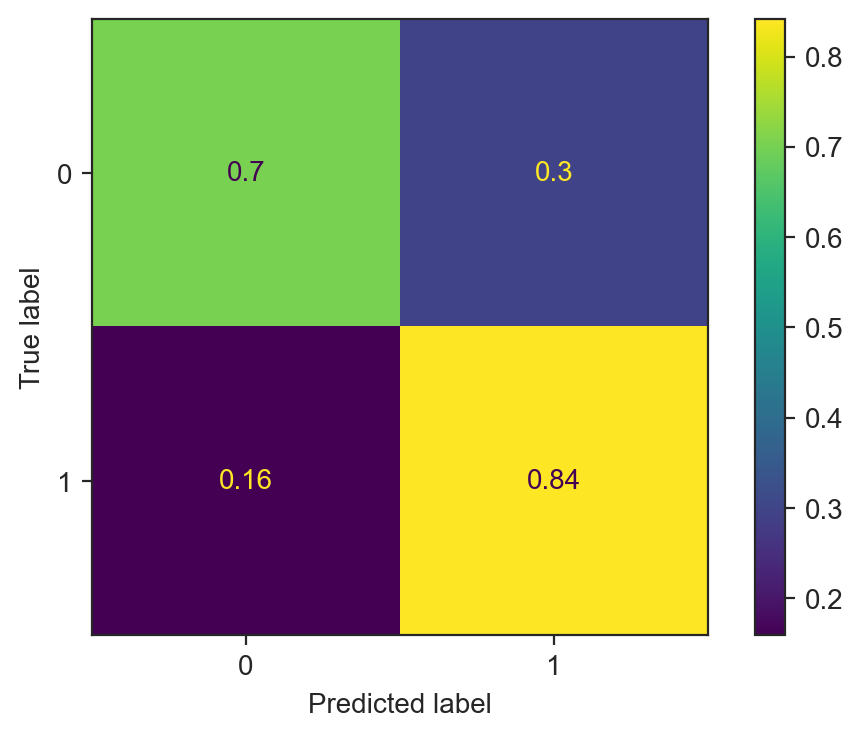

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,winning_hgb.predict(X_val_selected),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
# evaluate the model on your validation or test set
X_val_selected = X_val[selected_feature_names]
y_val_pred = winning_hgb.predict(X_val_selected)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.7847358121330724

In [ ]:
# X_train_selected = X_train[['HS', 'AS', 'HST', 'AST', 'HF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR',\
#        'AvgH', 'AvgD', 'AvgA', 'MaxH', 'MaxD', 'MaxA', 'MW', 'Year', 'Max>2.5',\
#        'Max<2.5', 'Avg>2.5', 'TGD', 'Elo_Before_Home', 'Days_D', 'form_diff',\
#        'Overall_diff', 'Attack_diff', 'Midfield_diff', 'Defence_diff']]

# X_val_selected = X_val[['HS', 'AS', 'HST', 'AST', 'HF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR',\
#        'AvgH', 'AvgD', 'AvgA', 'MaxH', 'MaxD', 'MaxA', 'MW', 'Year', 'Max>2.5',\
#        'Max<2.5', 'Avg>2.5', 'TGD', 'Elo_Before_Home', 'Days_D', 'form_diff',\
#        'Overall_diff', 'Attack_diff', 'Midfield_diff', 'Defence_diff']]

In [ ]:
hgb_results['diff']=abs(hgb_results['mean_train_score']-hgb_results['mean_test_score'])

sorted_table = hgb_results[['param_l2_regularization', 'param_learning_rate', 'param_max_depth',\
       'param_max_iter', 'param_max_leaf_nodes', 'param_min_samples_leaf','mean_train_score','mean_test_score','diff','rank_test_score']]\
                            .sort_values(by=['diff', 'mean_test_score'], ascending=[True, False])
sorted_table

,param_l2_regularization,param_learning_rate,param_max_depth,param_max_iter,param_max_leaf_nodes,param_min_samples_leaf,mean_train_score,mean_test_score,diff,rank_test_score
487,0.1,0.1,3,50,50,20,0.848239,0.814308,0.033931,1146
483,0.1,0.1,3,50,20,20,0.848239,0.814308,0.033931,1146
491,0.1,0.1,3,50,100,20,0.848239,0.814308,0.033931,1146
495,0.1,0.1,3,50,200,20,0.848239,0.814308,0.033931,1146
963,0.01,0.1,3,50,20,20,0.850436,0.813785,0.036650,1179
...,...,...,...,...,...,...,...,...,...,...
1180,0.01,0.1,20,100,200,2,1.000000,0.802932,0.197068,1432
220,0,0.1,20,100,200,2,1.000000,0.801392,0.198608,1437
684,0.1,0.1,20,50,200,2,1.000000,0.800877,0.199123,1438
1164,0.01,0.1,20,50,200,2,1.000000,0.790508,0.209492,1439


In [ ]:
sorted_table.iloc[0]

param_l2_regularization         0.1
param_learning_rate             0.1
param_max_depth                   3
param_max_iter                   50
param_max_leaf_nodes             50
param_min_samples_leaf           20
mean_train_score           0.848239
mean_test_score            0.814308
diff                       0.033931
rank_test_score                1146
Name: 487, dtype: object

In [ ]:
# Select the top model (small gap and high test score)
first_model = sorted_table.iloc[0]

# Display the first model's information
print("first Model:")
print(first_model)

first Model:
param_l2_regularization         0.1
param_learning_rate             0.1
param_max_depth                   3
param_max_iter                   50
param_max_leaf_nodes             50
param_min_samples_leaf           20
mean_train_score           0.848239
mean_test_score            0.814308
diff                       0.033931
rank_test_score                1146
Name: 487, dtype: object


In [ ]:
# # Define hyperparameters for the first model (adjust these values based on your first model)
# first_model_hyperparameters = {
#     'l2_regularization': 0.1,
#     'learning_rate': 0.1,
#     'max_depth': 3,
#     'max_leaf_nodes': 200,
#     'min_samples_leaf': 20,
#     'max_iter': 50
# }

# # Create a new instance of the HistGradientBoostingClassifier with the first model's hyperparameters
# first_hgb = HistGradientBoostingClassifier(**first_model_hyperparameters)

# kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # Iterate over the cross-validation folds
# for train_idx, val_idx in kfold.split(X_train_selected, y_train):
#     # Split the training data into training and validation sets for the fold
#     X_train_fold, X_val_fold = X_train_selected.iloc[train_idx], X_train_selected.iloc[val_idx]
#     y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]


# smote = SMOTE(sampling_strategy='auto', random_state=42)

# X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)

# first_hgb.fit(X_train_fold_resampled, y_train_fold_resampled)

# # Use the first model estimator to make predictions
# y_val_pred = first_hgb.predict(X_val_selected)

# # Calculate the validation accuracy
# val_accuracy = accuracy_score(y_val, y_val_pred)

# # Print the validation accuracy
# print("Validation Accuracy:", val_accuracy)


In [ ]:
# from sklearn.metrics import classification_report

# y_pred_hgb = first_hgb.predict(X_val_selected)
# class_report_hgb = classification_report(y_val, y_pred_hgb)
# print("\nClassification Report:")
# print(class_report_hgb)

In [ ]:
# from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# cm=confusion_matrix(y_val,first_hgb.predict(X_val_selected),normalize='true')
# ConfusionMatrixDisplay(confusion_matrix=cm).plot();

## **K- Nearest neighbor**

### scaling the data

In [ ]:
norm_cols=['MW', 'Year','Overall_diff', 'Attack_diff',\
       'Midfield_diff', 'Defence_diff']

In [ ]:
std_cols = [col for col in X_train.columns if col not in norm_cols]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,Normalizer

In [ ]:
# Create transformers
stdscaling_transformer = StandardScaler()
normscaling_transformer = Normalizer()

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("std", stdscaling_transformer, std_cols),
        ("norm", normscaling_transformer, norm_cols)
    ],
    remainder='passthrough'
)

# Apply the transformations and convert back to a pandas DataFrame
X_train_scale = preprocessor.fit_transform(X_train)
X_train_scale = pd.DataFrame(X_train_scale, columns=std_cols + norm_cols)

In [ ]:
X_train_scale.head(5)

,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,...,Elo_Before_Away,Days_D,form_diff,SP_diff,MW,Year,Overall_diff,Attack_diff,Midfield_diff,Defence_diff
0,1.076889,-0.884041,0.629452,-0.844202,-0.445835,-1.340967,1.728802,-1.363751,-1.213270,-1.364168,...,-0.263236,0.096672,0.365047,1.177314,0.006951,0.999944,0.004468,0.003972,0.002979,0.004468
1,-0.354754,0.342697,0.629452,-0.056537,0.442787,-0.197848,-0.573957,0.110711,1.233651,-0.565926,...,1.257670,0.007231,-0.916341,-1.756945,0.008420,0.999947,-0.002476,-0.004457,-0.001981,-0.002476
2,-1.249532,1.978349,-0.728953,3.094119,-1.038250,0.373712,-1.231889,-0.257904,-1.213270,-0.565926,...,0.280108,0.096672,0.030564,0.003610,0.002981,0.999975,-0.002484,-0.003477,-0.003974,-0.002484
3,0.003156,-0.884041,0.289851,-0.056537,-0.445835,0.659492,-0.244992,1.216558,-0.397630,1.828799,...,0.234011,0.186113,-0.146502,0.003610,0.005464,0.999984,0.000000,0.000000,-0.000994,0.000497
4,-0.891621,-0.884041,-1.068554,-0.844202,-1.334458,0.087932,-0.573957,-0.626520,-0.397630,1.030557,...,0.332989,-0.171652,-0.153809,-0.583242,0.008910,0.999955,0.001485,0.001980,0.001980,0.000990


In [ ]:
X_val_scale = preprocessor.fit_transform(X_val)
X_val_scale = pd.DataFrame(X_val_scale, columns=std_cols + norm_cols)

X_val_scale.head(5)

,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,...,Elo_Before_Away,Days_D,form_diff,SP_diff,MW,Year,Overall_diff,Attack_diff,Midfield_diff,Defence_diff
0,-1.219631,0.310567,-1.070002,1.067193,1.461710,0.278484,-0.556609,1.877360,1.226440,0.195149,...,-0.636771,0.031127,-0.387001,-0.803081,0.012915,0.999916,0.000497,-0.000497,-0.000993,-0.000497
1,-0.864716,-0.280127,-1.773244,-0.094744,0.563953,0.816502,1.365197,-1.005678,0.420899,1.019289,...,0.100577,0.031127,0.023050,0.384307,0.004946,0.999983,-0.000495,0.001484,-0.001978,-0.001484
2,-1.042173,0.113669,-0.718381,0.679881,0.563953,0.547493,0.404294,0.796221,1.226440,1.843429,...,0.171171,0.031127,-0.064818,-1.990470,0.000992,0.999985,-0.002479,-0.002975,-0.002975,-0.002479
3,0.022573,0.901261,1.039725,0.292569,0.863205,1.354519,0.083993,0.435841,0.420899,1.019289,...,0.253941,0.031127,-0.136641,-0.605183,0.004460,0.999962,0.003469,0.003964,0.004460,0.002973
4,1.619692,-1.264617,0.336483,-0.869368,-0.333804,-0.259533,2.326100,-1.726438,-1.190183,0.195149,...,0.235121,0.119492,-0.023431,-0.258862,0.002472,0.999989,0.001977,0.002472,0.000494,0.002472


### Fitting simple model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train_scale,y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import classification_report

y_pred_knn = knn.predict(X_val_scale)
class_report_knn = classification_report(y_val, y_pred_knn)
print("\nClassification Report:")
print(class_report_knn)


Classification Report:
              precision    recall  f1-score   support

           A       0.72      0.62      0.67       209
           H       0.76      0.83      0.80       302

    accuracy                           0.75       511
   macro avg       0.74      0.73      0.73       511
weighted avg       0.75      0.75      0.74       511



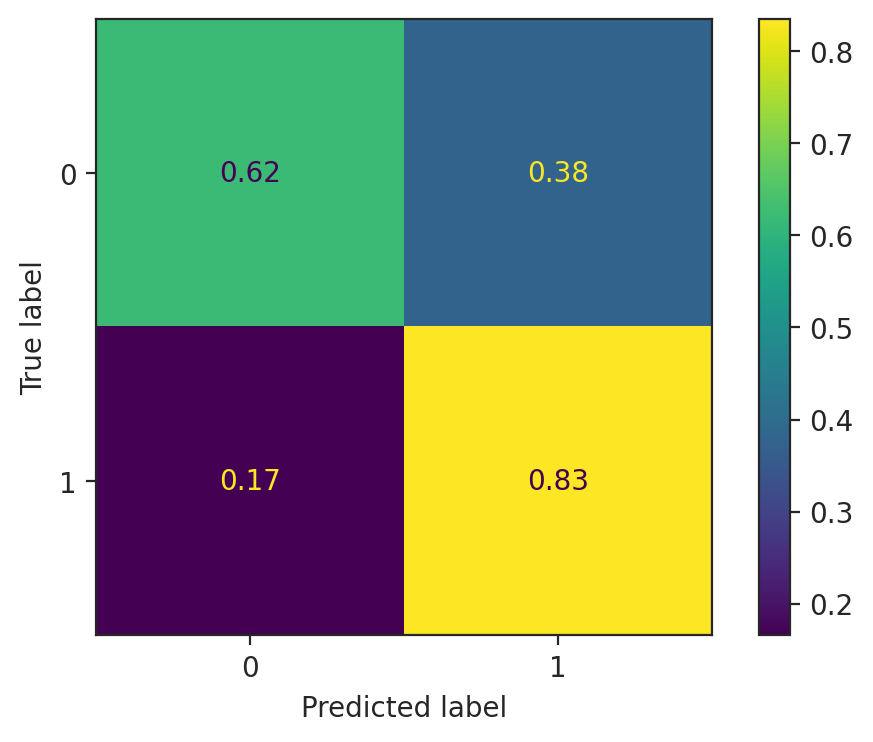

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,knn.predict(X_val_scale),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### Sequential feature selection

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector

# Create a StratifiedKFold cross-validation object
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize your Logistic Regression model
knn = KNeighborsClassifier()

# Initialize the Sequential Feature Selector
sfs = SequentialFeatureSelector(knn,
                                k_features='best',  # Select the best subset of features
                                forward=True,        # Forward selection (you can also try backward=False)
                                scoring='accuracy',  # Use accuracy as the evaluation metric
                                cv=kfold)

# Fit the SFS to your training data
sfs.fit(X_train_scale, y_train)

# Get the selected feature indices
selected_features_indices = np.array(sfs.k_feature_idx_)

# Get the names of the selected features
selected_feature_names = X_train_scale.columns[selected_features_indices]

# Select the features from your training data
X_train_selected = X_train_scale[selected_feature_names]

# Train your Logistic Regression model on the selected features
knn.fit(X_train_selected, y_train)

# Print the selected feature names
print("Selected feature names:", selected_feature_names)


Selected feature names: Index(['HST', 'AST', 'HC', 'AC', 'HR', 'AvgH', 'AvgD', 'AvgA', 'MaxH', 'MaxA'], dtype='object')


In [ ]:
# evaluate the model on your validation or test set
X_val_selected = X_val_scale[selected_feature_names]
y_val_pred = knn.predict(X_val_selected)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.776908023483366

### gridsearchCV

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import  make_scorer,f1_score,precision_score,recall_score


param_grid = {
    'n_neighbors': [2,5,8,10],
    'weights': ['uniform','distance'],

}


knn = KNeighborsClassifier()

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store cross-validation results
cv_scores = []

# Iterate over the cross-validation folds
for train_idx, val_idx in kfold.split(X_train_selected, y_train):
    # Split the training data into training and validation sets for the fold
    X_train_fold, X_val_fold = X_train_selected.iloc[train_idx], X_train_selected.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]


smote = SMOTE(sampling_strategy='auto', random_state=42)

scorer = make_scorer(f1_score, average='weighted')

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring=scorer, cv=kfold, return_train_score=True)

X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)

grid_search.fit(X_train_fold_resampled, y_train_fold_resampled)


best_estimator = grid_search.best_estimator_

In [ ]:
y_val_fold.value_counts()

H    241
A    167
Name: FTR, dtype: int64

In [ ]:
y_train.value_counts()

H    1208
A     833
Name: FTR, dtype: int64

In [ ]:
y_train_fold_resampled.value_counts()

H    967
A    967
Name: FTR, dtype: int64

In [ ]:
grid_search.best_score_

0.8108447473774255

In [ ]:
grid_search.best_params_

{'n_neighbors': 8, 'weights': 'distance'}

In [ ]:
knn_results = pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score')

In [ ]:
knn_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_neighbors', 'param_weights', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [ ]:
knn_results[['param_n_neighbors', 'param_weights','mean_train_score','mean_test_score','rank_test_score']]

,param_n_neighbors,param_weights,mean_train_score,mean_test_score,rank_test_score
5,8,distance,1.000000,0.810845,1
7,10,distance,1.000000,0.810417,2
3,5,distance,1.000000,0.809238,3
1,2,distance,1.000000,0.792286,4
2,5,uniform,0.858509,0.791964,5
6,10,uniform,0.823302,0.786182,6
4,8,uniform,0.832838,0.785350,7
0,2,uniform,0.867439,0.741992,8


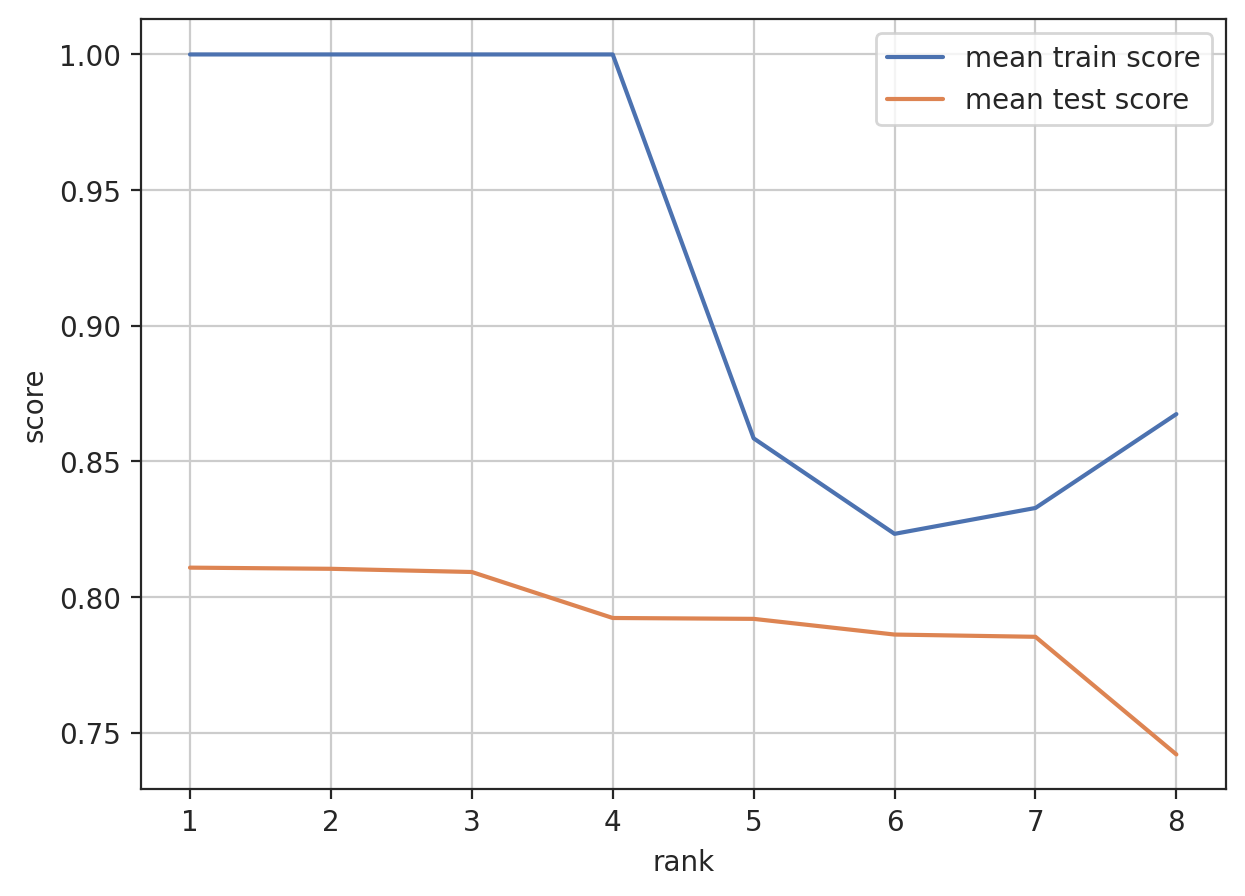

In [ ]:
fig,ax = plt.subplots(figsize=(7,5))
sns.lineplot(data=knn_results,x='rank_test_score',y='mean_train_score',ax=ax,errorbar=None)
sns.lineplot(data=knn_results,x='rank_test_score',y='mean_test_score',ax=ax,errorbar=None)
ax.legend(['mean train score','mean test score'])
ax.set_xlabel('rank')
ax.set_ylabel('score')
plt.grid(visible=True)

In [ ]:
winning_knn = grid_search.best_estimator_

In [ ]:
winning_knn

KNeighborsClassifier(n_neighbors=8, weights='distance')

In [ ]:
from sklearn.metrics import classification_report

y_pred_lg = winning_knn.predict(X_val_selected)
class_report_lg = classification_report(y_val, y_pred_lg)
print("\nClassification Report:")
print(class_report_lg)


Classification Report:
              precision    recall  f1-score   support

           A       0.70      0.73      0.72       209
           H       0.81      0.78      0.80       302

    accuracy                           0.76       511
   macro avg       0.76      0.76      0.76       511
weighted avg       0.77      0.76      0.76       511



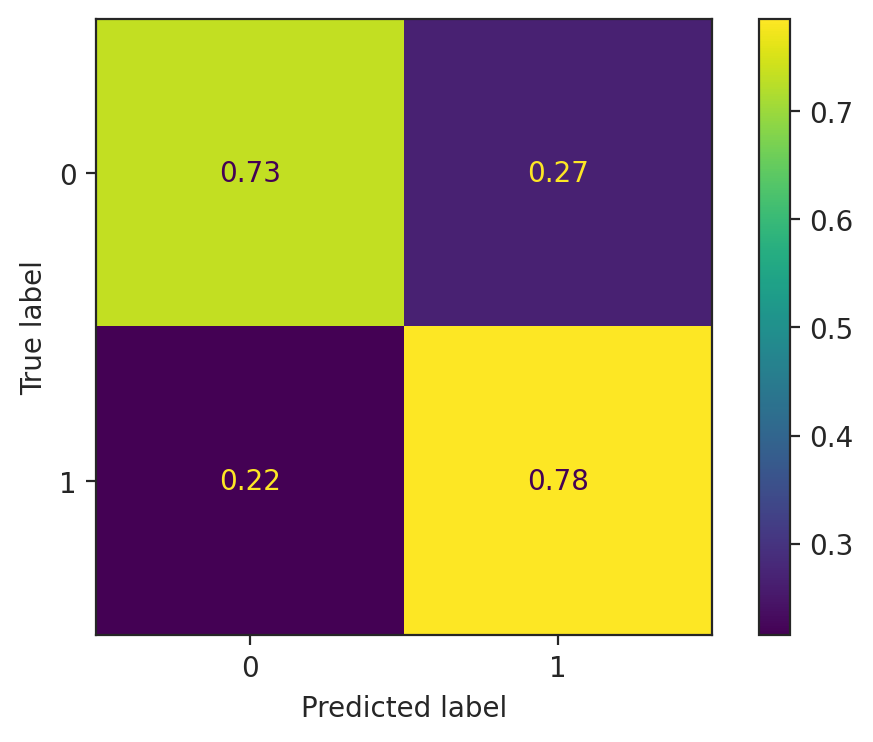

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,winning_knn.predict(X_val_selected),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 10 , weights = 'uniform')

In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over the cross-validation folds
for train_idx, val_idx in kfold.split(X_train_selected, y_train):
    # Split the training data into training and validation sets for the fold
    X_train_fold, X_val_fold = X_train_selected.iloc[train_idx], X_train_selected.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]


smote = SMOTE(sampling_strategy='auto', random_state=42)

X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)

knn.fit(X_train_fold_resampled, y_train_fold_resampled)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
X_train_fold.shape

(1633, 10)

In [ ]:
from sklearn.metrics import classification_report

y_pred_lg = knn.predict(X_val_selected)
class_report_knn = classification_report(y_val, y_pred_lg)
print("\nClassification Report:")
print(class_report_knn)


Classification Report:
              precision    recall  f1-score   support

           A       0.71      0.80      0.75       209
           H       0.85      0.77      0.81       302

    accuracy                           0.78       511
   macro avg       0.78      0.79      0.78       511
weighted avg       0.79      0.78      0.78       511



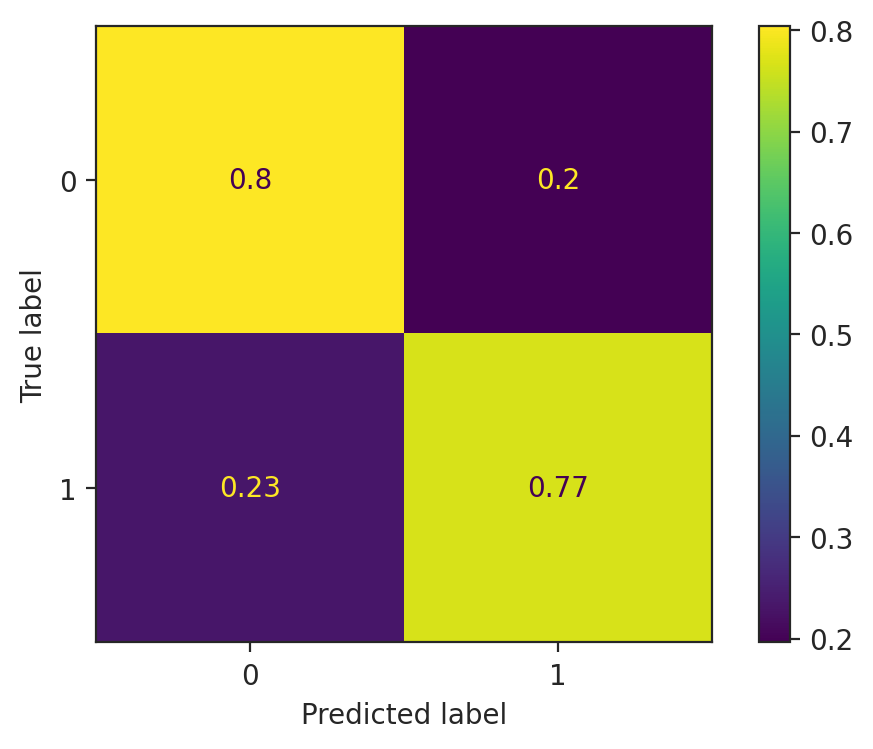

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,knn.predict(X_val_selected),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

## **SVM**

In [ ]:
from sklearn.svm import SVC
svc =SVC()

### scaling the data

In [ ]:
norm_cols=['MW', 'Year','Overall_diff', 'Attack_diff',\
       'Midfield_diff', 'Defence_diff']

In [ ]:
std_cols = [col for col in X_train.columns if col not in norm_cols]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,Normalizer

In [ ]:
# Create transformers
stdscaling_transformer = StandardScaler()
normscaling_transformer = Normalizer()

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("std", stdscaling_transformer, std_cols),
        ("norm", normscaling_transformer, norm_cols)
    ],
    remainder='passthrough'
)

# Apply the transformations and convert back to a pandas DataFrame
X_train_scale = preprocessor.fit_transform(X_train)
X_train_scale = pd.DataFrame(X_train_scale, columns=std_cols + norm_cols)

In [ ]:
X_train_scale.head(5)

,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,...,Elo_Before_Away,Days_D,form_diff,SP_diff,MW,Year,Overall_diff,Attack_diff,Midfield_diff,Defence_diff
0,1.076889,-0.884041,0.629452,-0.844202,-0.445835,-1.340967,1.728802,-1.363751,-1.213270,-1.364168,...,-0.263236,0.096672,0.365047,1.177314,0.006951,0.999944,0.004468,0.003972,0.002979,0.004468
1,-0.354754,0.342697,0.629452,-0.056537,0.442787,-0.197848,-0.573957,0.110711,1.233651,-0.565926,...,1.257670,0.007231,-0.916341,-1.756945,0.008420,0.999947,-0.002476,-0.004457,-0.001981,-0.002476
2,-1.249532,1.978349,-0.728953,3.094119,-1.038250,0.373712,-1.231889,-0.257904,-1.213270,-0.565926,...,0.280108,0.096672,0.030564,0.003610,0.002981,0.999975,-0.002484,-0.003477,-0.003974,-0.002484
3,0.003156,-0.884041,0.289851,-0.056537,-0.445835,0.659492,-0.244992,1.216558,-0.397630,1.828799,...,0.234011,0.186113,-0.146502,0.003610,0.005464,0.999984,0.000000,0.000000,-0.000994,0.000497
4,-0.891621,-0.884041,-1.068554,-0.844202,-1.334458,0.087932,-0.573957,-0.626520,-0.397630,1.030557,...,0.332989,-0.171652,-0.153809,-0.583242,0.008910,0.999955,0.001485,0.001980,0.001980,0.000990


In [ ]:
X_val_scale = preprocessor.fit_transform(X_val)
X_val_scale = pd.DataFrame(X_val_scale, columns=std_cols + norm_cols)

X_val_scale.head(5)

,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,...,Elo_Before_Away,Days_D,form_diff,SP_diff,MW,Year,Overall_diff,Attack_diff,Midfield_diff,Defence_diff
0,-1.219631,0.310567,-1.070002,1.067193,1.461710,0.278484,-0.556609,1.877360,1.226440,0.195149,...,-0.636771,0.031127,-0.387001,-0.803081,0.012915,0.999916,0.000497,-0.000497,-0.000993,-0.000497
1,-0.864716,-0.280127,-1.773244,-0.094744,0.563953,0.816502,1.365197,-1.005678,0.420899,1.019289,...,0.100577,0.031127,0.023050,0.384307,0.004946,0.999983,-0.000495,0.001484,-0.001978,-0.001484
2,-1.042173,0.113669,-0.718381,0.679881,0.563953,0.547493,0.404294,0.796221,1.226440,1.843429,...,0.171171,0.031127,-0.064818,-1.990470,0.000992,0.999985,-0.002479,-0.002975,-0.002975,-0.002479
3,0.022573,0.901261,1.039725,0.292569,0.863205,1.354519,0.083993,0.435841,0.420899,1.019289,...,0.253941,0.031127,-0.136641,-0.605183,0.004460,0.999962,0.003469,0.003964,0.004460,0.002973
4,1.619692,-1.264617,0.336483,-0.869368,-0.333804,-0.259533,2.326100,-1.726438,-1.190183,0.195149,...,0.235121,0.119492,-0.023431,-0.258862,0.002472,0.999989,0.001977,0.002472,0.000494,0.002472


### Fitting simple model

In [ ]:
svc.fit(X_train_scale,y_train)

SVC()

In [ ]:
from sklearn.metrics import classification_report

y_pred_svc = svc.predict(X_val_scale)
class_report_svc = classification_report(y_val, y_pred_svc)
print("\nClassification Report:")
print(class_report_svc)


Classification Report:
              precision    recall  f1-score   support

           A       0.82      0.70      0.75       209
           H       0.81      0.89      0.85       302

    accuracy                           0.81       511
   macro avg       0.82      0.80      0.80       511
weighted avg       0.81      0.81      0.81       511



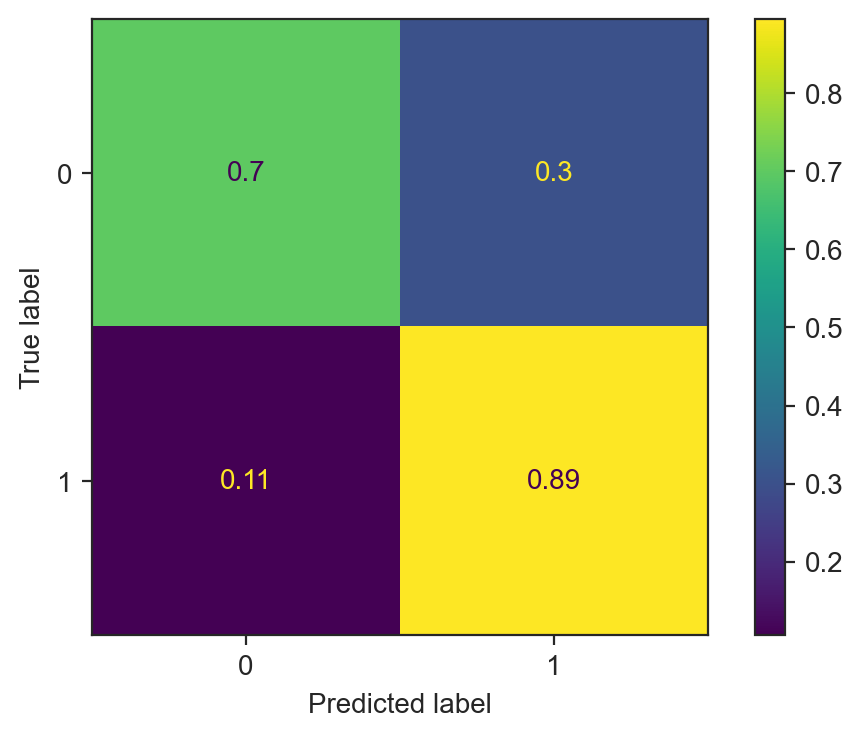

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,svc.predict(X_val_scale),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
from sklearn.metrics import accuracy_score

y_val_pred = svc.predict(X_val_scale)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.8140900195694716

### Sequential feature selection

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector

# Create a StratifiedKFold cross-validation object
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize your Logistic Regression model
svc =SVC()

# Initialize the Sequential Feature Selector
sfs = SequentialFeatureSelector(svc,
                                k_features='best',  # Select the best subset of features
                                forward=True,        # Forward selection (you can also try backward=False)
                                scoring='accuracy',  # Use accuracy as the evaluation metric
                                cv=kfold)

# Fit the SFS to your training data
sfs.fit(X_train_scale, y_train)

# Get the selected feature indices
selected_features_indices = np.array(sfs.k_feature_idx_)

# Get the names of the selected features
selected_feature_names = X_train_scale.columns[selected_features_indices]

# Select the features from your training data
X_train_selected = X_train_scale[selected_feature_names]

# Train your Logistic Regression model on the selected features
svc.fit(X_train_selected, y_train)

# Print the selected feature names
print("Selected feature names:", selected_feature_names)





Selected feature names: Index(['HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HR', 'AvgD', 'AvgA', 'MaxH',
       'MaxD', 'MaxA', 'Year'],
      dtype='object')


In [ ]:
# evaluate the model on your validation or test set
X_val_selected = X_val_scale[selected_feature_names]
y_val_pred = svc.predict(X_val_selected)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.8140900195694716

### gridsearchCV

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import  make_scorer,f1_score,precision_score,recall_score


param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],          # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],    # Kernel type: linear, radial basis function (RBF), polynomial
    'degree': [2, 3, 4],                   # Degree for polynomial kernel (if used)
    'gamma': ['scale', 'auto'] + [0.001, 0.01, 0.1, 1],  # Kernel coefficient (gamma), 'scale', 'auto', or specific values
    'class_weight': ['balanced', None],     # Class weight: balanced or None
}


svc = SVC()

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store cross-validation results
cv_scores = []

# Iterate over the cross-validation folds
for train_idx, val_idx in kfold.split(X_train_selected, y_train):
    # Split the training data into training and validation sets for the fold
    X_train_fold, X_val_fold = X_train_selected.iloc[train_idx], X_train_selected.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]


smote = SMOTE(sampling_strategy='auto', random_state=42)

scorer = make_scorer(f1_score, average='weighted')

grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring=scorer, cv=kfold,return_train_score=True)

X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)

grid_search.fit(X_train_fold_resampled, y_train_fold_resampled)


best_estimator = grid_search.best_estimator_

In [ ]:
y_val_fold.value_counts()

H    241
A    167
Name: FTR, dtype: int64

In [ ]:
y_train.value_counts()

H    1208
A     833
Name: FTR, dtype: int64

In [ ]:
y_train_fold_resampled.value_counts()

H    967
A    967
Name: FTR, dtype: int64

In [ ]:
grid_search.best_score_

0.8200473648706069

In [ ]:
grid_search.best_params_

{'C': 1,
 'class_weight': 'balanced',
 'degree': 2,
 'gamma': 0.1,
 'kernel': 'rbf'}

In [ ]:
svc_results = pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score')

In [ ]:
svc_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_class_weight', 'param_degree', 'param_gamma',
       'param_kernel', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [ ]:
svc_results[['param_C', 'param_class_weight', 'param_degree', 'param_gamma','param_kernel','mean_train_score','mean_test_score','rank_test_score']]

,param_C,param_class_weight,param_degree,param_gamma,param_kernel,mean_train_score,mean_test_score,rank_test_score
391,1,None,2,0.1,rbf,0.841775,0.820047,1
355,1,balanced,3,0.1,rbf,0.841646,0.820047,1
427,1,None,4,0.1,rbf,0.841775,0.820047,1
337,1,balanced,2,0.1,rbf,0.841646,0.820047,1
409,1,None,3,0.1,rbf,0.841775,0.820047,1
...,...,...,...,...,...,...,...,...
47,0.001,balanced,4,0.01,poly,0.334479,0.333332,524
44,0.001,balanced,4,0.001,poly,0.334479,0.333332,524
26,0.001,balanced,3,0.001,poly,0.334764,0.333332,524
206,0.01,None,4,0.001,poly,0.334479,0.333332,524


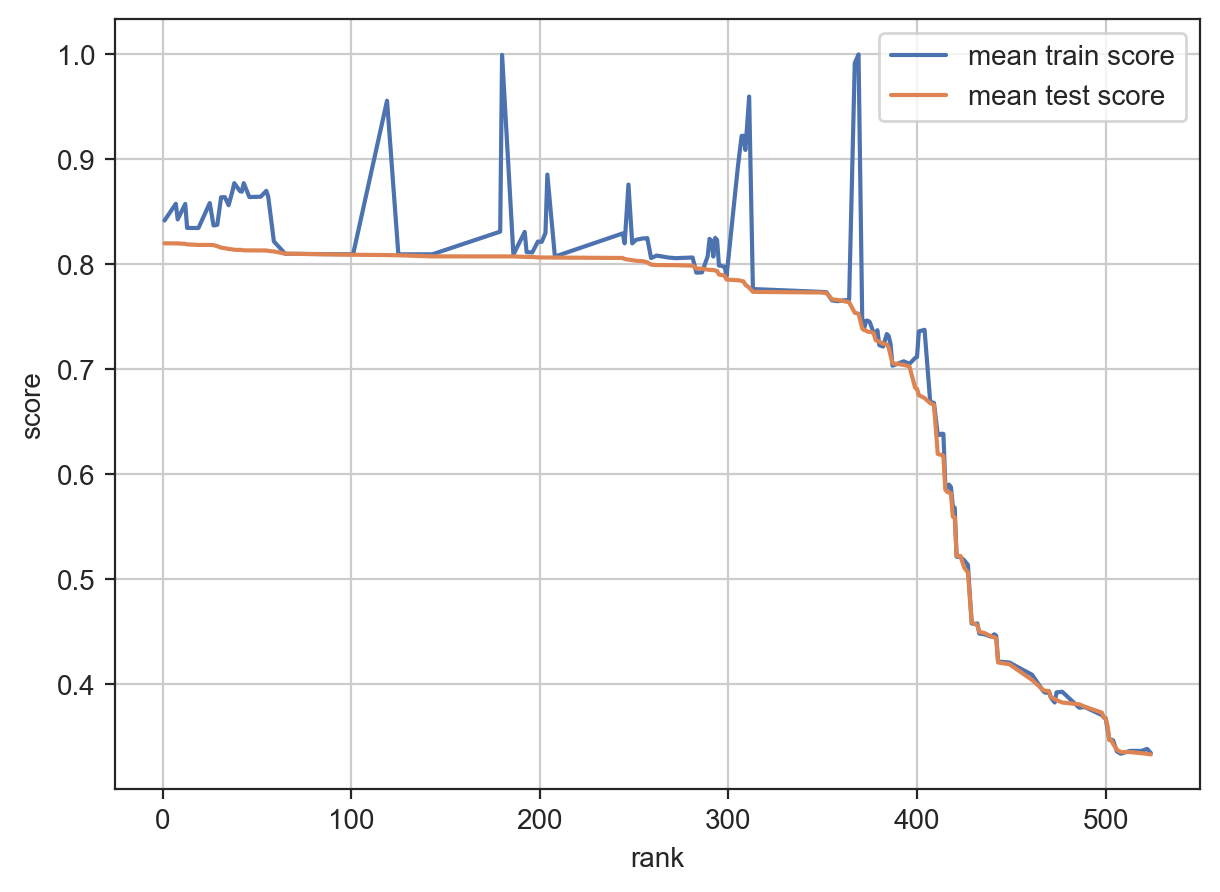

In [ ]:
fig,ax = plt.subplots(figsize=(7,5))
sns.lineplot(data=svc_results,x='rank_test_score',y='mean_train_score',ax=ax,ci=None)
sns.lineplot(data=svc_results,x='rank_test_score',y='mean_test_score',ax=ax,ci=None)
ax.legend(['mean train score','mean test score'])
ax.set_xlabel('rank')
ax.set_ylabel('score')
plt.grid(visible=True)

In [ ]:
winning_svc = grid_search.best_estimator_

In [ ]:
winning_svc

SVC(C=1, class_weight='balanced', degree=2, gamma=0.1)

In [ ]:
from sklearn.metrics import classification_report

y_pred_svc = winning_svc.predict(X_val_selected)
class_report_svc = classification_report(y_val, y_pred_svc)
print("\nClassification Report:")
print(class_report_svc)


Classification Report:
              precision    recall  f1-score   support

           A       0.77      0.77      0.77       209
           H       0.84      0.84      0.84       302

    accuracy                           0.81       511
   macro avg       0.80      0.80      0.80       511
weighted avg       0.81      0.81      0.81       511



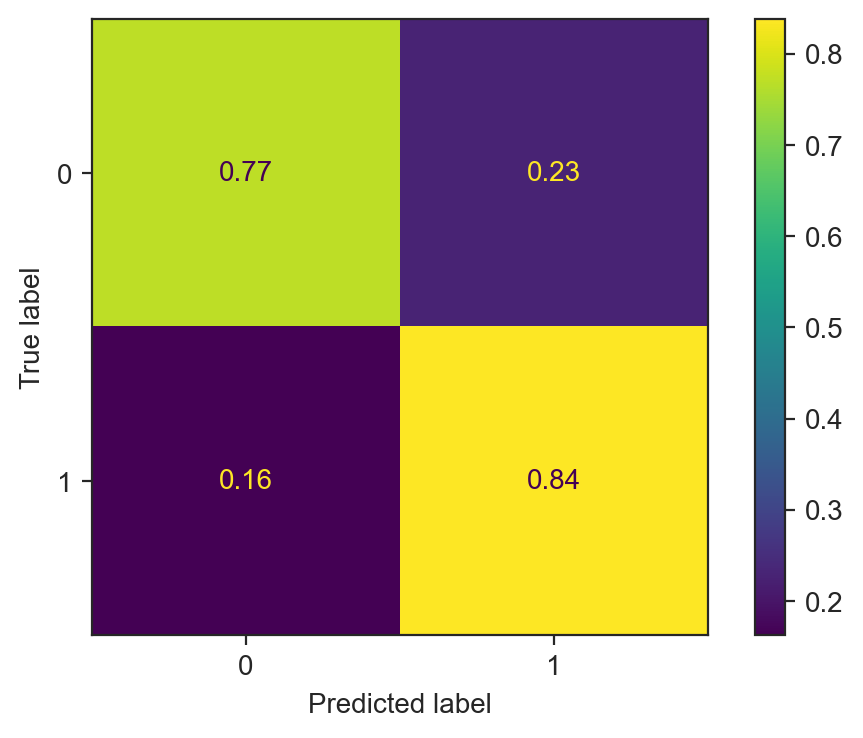

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,winning_svc.predict(X_val_selected),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
# evaluate the model on your validation or test set
X_val_selected = X_val_scale[selected_feature_names]
y_val_pred = winning_svc.predict(X_val_selected)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.8101761252446184

In [ ]:
svc_results['diff']=abs(svc_results['mean_train_score']-svc_results['mean_test_score'])

sorted_table = svc_results[['param_C', 'param_class_weight', 'param_degree', 'param_gamma','param_kernel',\
                            'mean_train_score','mean_test_score','diff','rank_test_score']]\
                            .sort_values(by=['diff', 'mean_test_score'], ascending=[True, False])
sorted_table

,param_C,param_class_weight,param_degree,param_gamma,param_kernel,mean_train_score,mean_test_score,diff,rank_test_score
282,0.1,None,2,0.1,linear,0.810187,0.810172,0.000015,65
285,0.1,None,2,1,linear,0.810187,0.810172,0.000015,65
288,0.1,None,3,scale,linear,0.810187,0.810172,0.000015,65
291,0.1,None,3,auto,linear,0.810187,0.810172,0.000015,65
294,0.1,None,3,0.001,linear,0.810187,0.810172,0.000015,65
...,...,...,...,...,...,...,...,...,...
466,10,balanced,3,1,rbf,0.999483,0.807560,0.191923,180
377,1,balanced,4,1,poly,0.991598,0.753904,0.237694,367
431,1,None,4,1,poly,0.991598,0.753904,0.237694,367
485,10,balanced,4,1,poly,0.999871,0.753045,0.246825,369


In [ ]:
# sorted_table.loc[sorted_table['mean_test_score'] > 0.50].sort_values(by=['diff', 'mean_test_score'], ascending=[True, False])

In [ ]:
# param_svc = sorted_table.loc[(sorted_table['mean_test_score'] > 0.50) & (sorted_table['rank_test_score'] < 200)]\
# .sort_values(by=['diff', 'mean_test_score'], ascending=[True, False])

# param_svc

In [ ]:
# param_svc.iloc[0]

In [ ]:
# svc = SVC(C =0.1, class_weight = None, degree = 2, gamma = 'scale', kernel = 'linear')

In [ ]:
# svc.fit(X_train_selected,y_train)

In [ ]:
# from sklearn.metrics import classification_report

# y_pred_svc = svc.predict(X_val_selected)
# class_report_svc = classification_report(y_val, y_pred_svc)
# print("\nClassification Report:")
# print(class_report_svc)

In [ ]:
# from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# cm=confusion_matrix(y_val,svc.predict(X_val_selected),normalize='true')
# ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
# # evaluate the model on your validation or test set
# X_val_selected = X_val_scale[selected_feature_names]
# y_val_pred = svc.predict(X_val_selected)
# val_accuracy = accuracy_score(y_val, y_val_pred)
# val_accuracy

## **GNB**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

### Fitting simple model

In [ ]:
nb.fit(X_train,y_train)

GaussianNB()

In [ ]:
from sklearn.metrics import classification_report

y_pred_nb = nb.predict(X_val)
class_report_nb = classification_report(y_val, y_pred_nb)
print("\nClassification Report:")
print(class_report_nb)


Classification Report:
              precision    recall  f1-score   support

           A       0.61      0.82      0.70       209
           H       0.84      0.64      0.73       302

    accuracy                           0.72       511
   macro avg       0.73      0.73      0.72       511
weighted avg       0.75      0.72      0.72       511



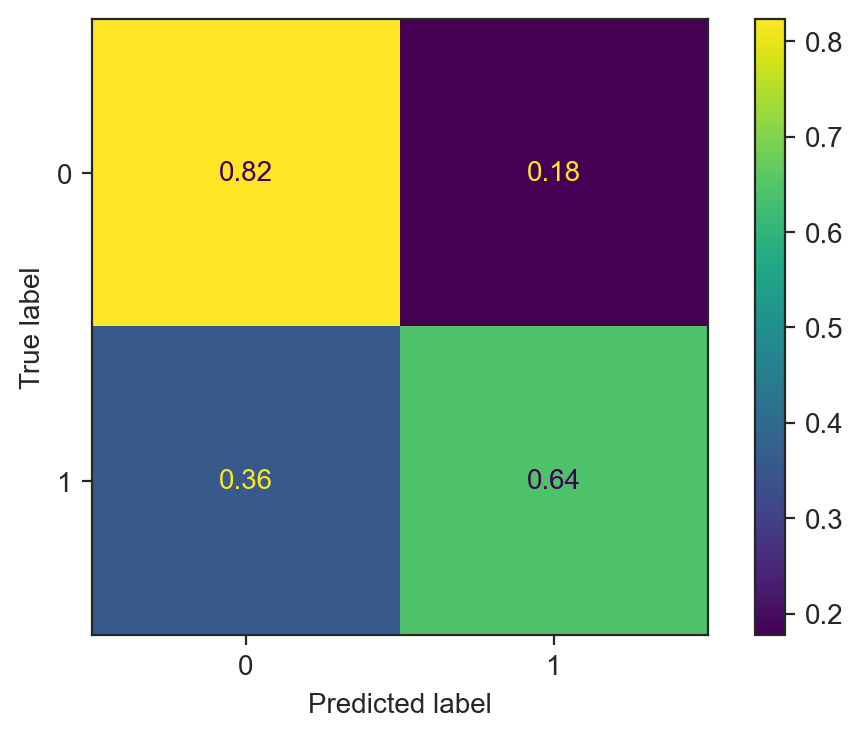

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,nb.predict(X_val),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
from sklearn.metrics import accuracy_score

y_val_pred = nb.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.7162426614481409

### Sequential feature selection

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector

# Create a StratifiedKFold cross-validation object
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize your Logistic Regression model
nb = GaussianNB()

# Initialize the Sequential Feature Selector
sfs = SequentialFeatureSelector(nb,
                                k_features='best',  # Select the best subset of features
                                forward=True,        # Forward selection (you can also try backward=False)
                                scoring='accuracy',  # Use accuracy as the evaluation metric
                                cv=kfold)

# Fit the SFS to your training data
sfs.fit(X_train, y_train)

# Get the selected feature indices
selected_features_indices = np.array(sfs.k_feature_idx_)

# Get the names of the selected features
selected_feature_names = X_train.columns[selected_features_indices]

# Select the features from your training data
X_train_selected = X_train[selected_feature_names]

# Train your Logistic Regression model on the selected features
nb.fit(X_train_selected, y_train)

# Print the selected feature names
print("Selected feature names:", selected_feature_names)





Selected feature names: Index(['HST', 'AST', 'HF', 'AF', 'MW', 'Year', 'Defence_diff'], dtype='object')


In [ ]:
# evaluate the model on your validation or test set
X_val_selected = X_val[selected_feature_names]
y_val_pred = nb.predict(X_val_selected)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.786692759295499

### gridsearchCV

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.metrics import  make_scorer,f1_score,precision_score,recall_score


param_grid = {
   'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],  # Smoothing parameter for avoiding zero probabilities

}



nb = GaussianNB()

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store cross-validation results
cv_scores = []

# Iterate over the cross-validation folds
for train_idx, val_idx in kfold.split(X_train_selected, y_train):
    # Split the training data into training and validation sets for the fold
    X_train_fold, X_val_fold = X_train_selected.iloc[train_idx], X_train_selected.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]


smote = SMOTE(sampling_strategy='auto', random_state=42)

scorer = make_scorer(f1_score, average='weighted')

grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, scoring=scorer, cv=kfold,return_train_score=True)

X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)

grid_search.fit(X_train_fold_resampled, y_train_fold_resampled)


best_estimator = grid_search.best_estimator_

In [ ]:
y_val_fold.value_counts()

H    241
A    167
Name: FTR, dtype: int64

In [ ]:
y_train.value_counts()

H    1208
A     833
Name: FTR, dtype: int64

In [ ]:
y_train_fold_resampled.value_counts()

H    967
A    967
Name: FTR, dtype: int64

In [ ]:
grid_search.best_score_

0.7491625168806222

In [ ]:
grid_search.best_params_

{'var_smoothing': 1e-09}

In [ ]:
nb_results = pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score')

In [ ]:
nb_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_var_smoothing', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [ ]:
nb_results[['param_var_smoothing', 'mean_train_score','mean_test_score','rank_test_score']]

,param_var_smoothing,mean_train_score,mean_test_score,rank_test_score
0,0.0,0.755428,0.749163,1
1,0.0,0.755428,0.749163,1
2,0.0,0.755428,0.749163,1
3,0.000001,0.755428,0.749163,1
4,0.00001,0.755428,0.749163,1


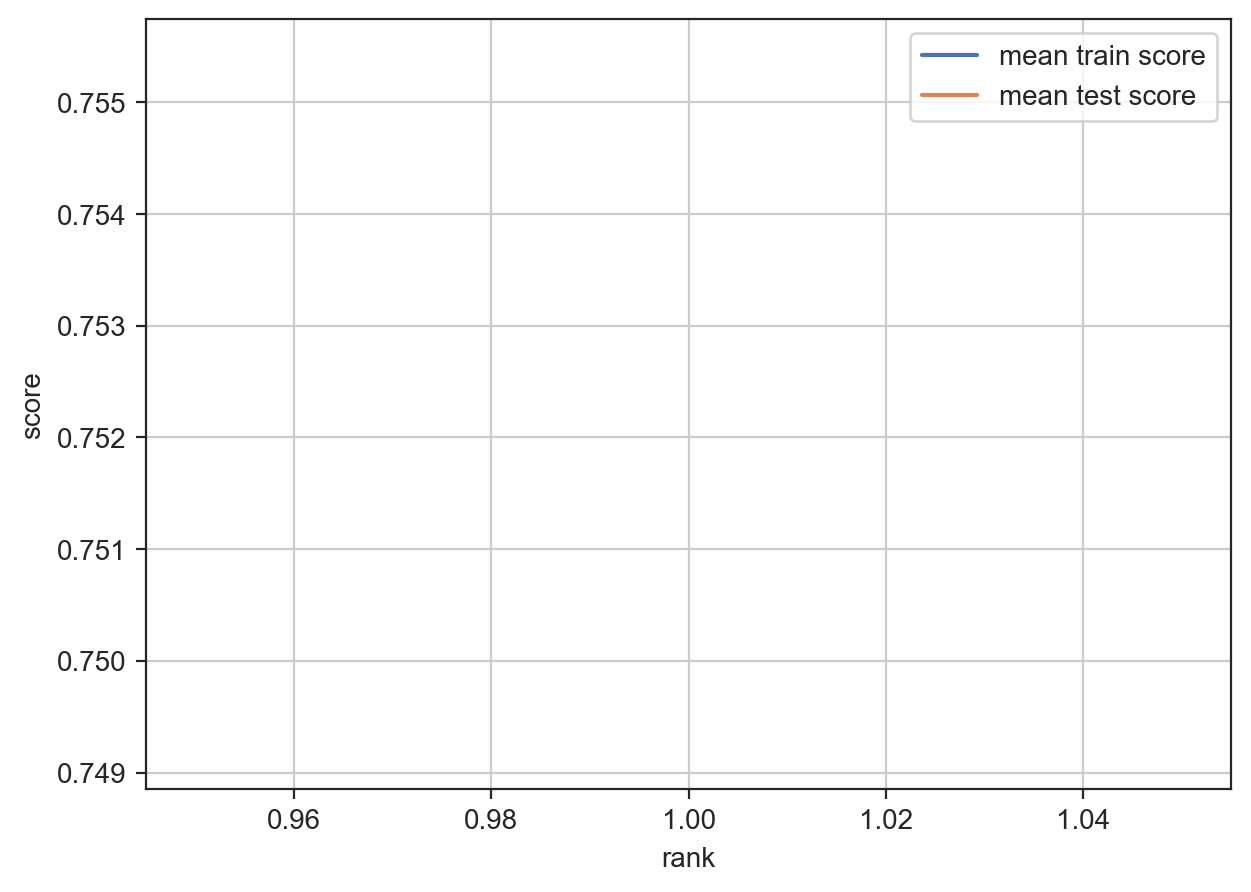

In [ ]:
fig,ax = plt.subplots(figsize=(7,5))
sns.lineplot(data=nb_results,x='rank_test_score',y='mean_train_score',ax=ax,ci=None)
sns.lineplot(data=nb_results,x='rank_test_score',y='mean_test_score',ax=ax,ci=None)
ax.legend(['mean train score','mean test score'])
ax.set_xlabel('rank')
ax.set_ylabel('score')
plt.grid(visible=True)

In [ ]:
winning_nb = grid_search.best_estimator_

In [ ]:
winning_nb

GaussianNB()

In [ ]:
from sklearn.metrics import classification_report

y_pred_nb = winning_nb.predict(X_val_selected)
class_report_nb = classification_report(y_val, y_pred_nb)
print("\nClassification Report:")
print(class_report_nb)


Classification Report:
              precision    recall  f1-score   support

           A       0.68      0.81      0.74       209
           H       0.85      0.74      0.79       302

    accuracy                           0.77       511
   macro avg       0.77      0.78      0.77       511
weighted avg       0.78      0.77      0.77       511



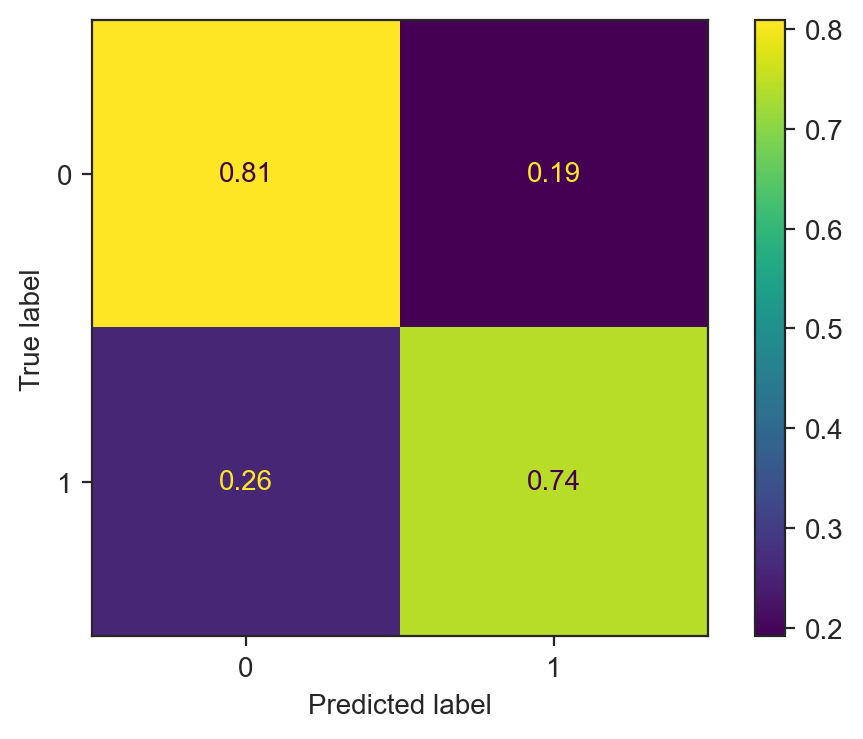

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,winning_nb.predict(X_val_selected),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
# evaluate the model on your validation or test set
X_val_selected = X_val[selected_feature_names]
y_val_pred = winning_nb.predict(X_val_selected)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.7690802348336595

## MLP

In [ ]:
from sklearn.neural_network import MLPClassifier


### scaling the data

In [ ]:
norm_cols=['MW', 'Year','Overall_diff', 'Attack_diff',\
       'Midfield_diff', 'Defence_diff']

In [ ]:
std_cols = [col for col in X_train.columns if col not in norm_cols]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,Normalizer

In [ ]:
# Create transformers
stdscaling_transformer = StandardScaler()
normscaling_transformer = Normalizer()

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("std", stdscaling_transformer, std_cols),
        ("norm", normscaling_transformer, norm_cols)
    ],
    remainder='passthrough'
)

# Apply the transformations and convert back to a pandas DataFrame
X_train_scale = preprocessor.fit_transform(X_train)
X_train_scale = pd.DataFrame(X_train_scale, columns=std_cols + norm_cols)

In [ ]:
X_train_scale.head(5)

,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,...,Elo_Before_Away,Days_D,form_diff,SP_diff,MW,Year,Overall_diff,Attack_diff,Midfield_diff,Defence_diff
0,1.076889,-0.884041,0.629452,-0.844202,-0.445835,-1.340967,1.728802,-1.363751,-1.213270,-1.364168,...,-0.263236,0.096672,0.365047,1.177314,0.006951,0.999944,0.004468,0.003972,0.002979,0.004468
1,-0.354754,0.342697,0.629452,-0.056537,0.442787,-0.197848,-0.573957,0.110711,1.233651,-0.565926,...,1.257670,0.007231,-0.916341,-1.756945,0.008420,0.999947,-0.002476,-0.004457,-0.001981,-0.002476
2,-1.249532,1.978349,-0.728953,3.094119,-1.038250,0.373712,-1.231889,-0.257904,-1.213270,-0.565926,...,0.280108,0.096672,0.030564,0.003610,0.002981,0.999975,-0.002484,-0.003477,-0.003974,-0.002484
3,0.003156,-0.884041,0.289851,-0.056537,-0.445835,0.659492,-0.244992,1.216558,-0.397630,1.828799,...,0.234011,0.186113,-0.146502,0.003610,0.005464,0.999984,0.000000,0.000000,-0.000994,0.000497
4,-0.891621,-0.884041,-1.068554,-0.844202,-1.334458,0.087932,-0.573957,-0.626520,-0.397630,1.030557,...,0.332989,-0.171652,-0.153809,-0.583242,0.008910,0.999955,0.001485,0.001980,0.001980,0.000990


In [ ]:
X_val_scale = preprocessor.fit_transform(X_val)
X_val_scale = pd.DataFrame(X_val_scale, columns=std_cols + norm_cols)

X_val_scale.head(5)

,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,...,Elo_Before_Away,Days_D,form_diff,SP_diff,MW,Year,Overall_diff,Attack_diff,Midfield_diff,Defence_diff
0,-1.219631,0.310567,-1.070002,1.067193,1.461710,0.278484,-0.556609,1.877360,1.226440,0.195149,...,-0.636771,0.031127,-0.387001,-0.803081,0.012915,0.999916,0.000497,-0.000497,-0.000993,-0.000497
1,-0.864716,-0.280127,-1.773244,-0.094744,0.563953,0.816502,1.365197,-1.005678,0.420899,1.019289,...,0.100577,0.031127,0.023050,0.384307,0.004946,0.999983,-0.000495,0.001484,-0.001978,-0.001484
2,-1.042173,0.113669,-0.718381,0.679881,0.563953,0.547493,0.404294,0.796221,1.226440,1.843429,...,0.171171,0.031127,-0.064818,-1.990470,0.000992,0.999985,-0.002479,-0.002975,-0.002975,-0.002479
3,0.022573,0.901261,1.039725,0.292569,0.863205,1.354519,0.083993,0.435841,0.420899,1.019289,...,0.253941,0.031127,-0.136641,-0.605183,0.004460,0.999962,0.003469,0.003964,0.004460,0.002973
4,1.619692,-1.264617,0.336483,-0.869368,-0.333804,-0.259533,2.326100,-1.726438,-1.190183,0.195149,...,0.235121,0.119492,-0.023431,-0.258862,0.002472,0.999989,0.001977,0.002472,0.000494,0.002472


### Fitting simple model

In [ ]:
mlp = MLPClassifier(max_iter=1500)
mlp.fit(X_train_scale,y_train)

MLPClassifier(max_iter=1500)

In [ ]:
from sklearn.metrics import classification_report

y_pred_mlp = mlp.predict(X_val_scale)
class_report_mlp = classification_report(y_val, y_pred_mlp)
print("\nClassification Report:")
print(class_report_mlp)


Classification Report:
              precision    recall  f1-score   support

           A       0.74      0.69      0.71       209
           H       0.79      0.83      0.81       302

    accuracy                           0.77       511
   macro avg       0.77      0.76      0.76       511
weighted avg       0.77      0.77      0.77       511



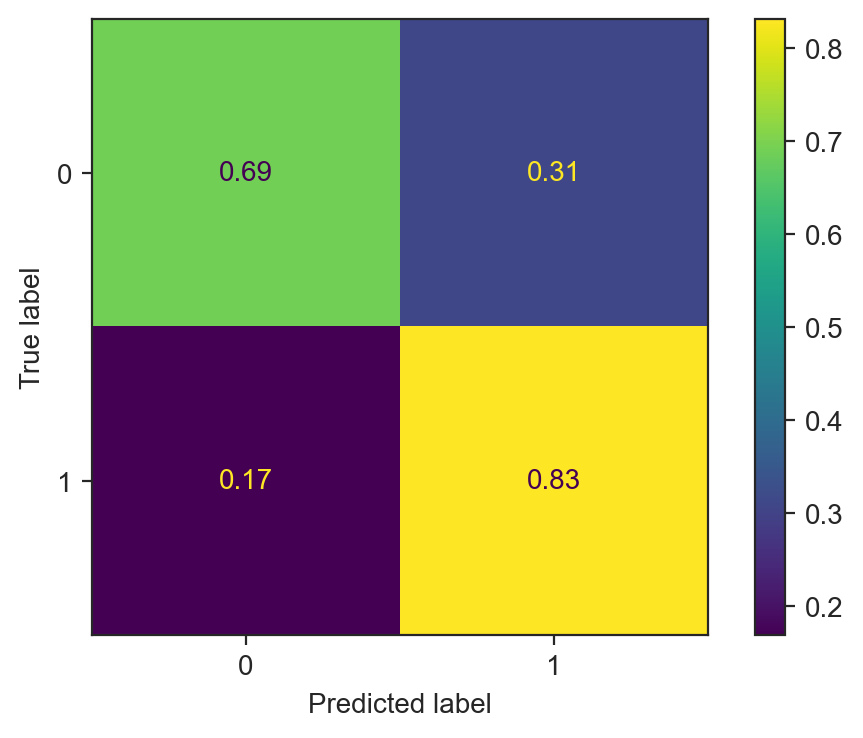

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,mlp.predict(X_val_scale),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
from sklearn.metrics import accuracy_score

y_val_pred = mlp.predict(X_val_scale)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.7729941291585127

### gridsearchCV

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import  make_scorer,f1_score,precision_score,recall_score


param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],  # Number of neurons in each hidden layer
    'activation': ['relu', 'tanh', 'logistic','identity'],       # Activation functions for hidden layers
    'solver': ['adam', 'lbfgs'],                     # Optimization algorithm
    'alpha': [0.0001, 0.001, 0.01],                 # L2 regularization term
    'learning_rate': ['constant', 'invscaling', 'adaptive'],  # Learning rate schedule
    'max_iter': [2000, 3000],                     # Maximum number of iterations
    'early_stopping' : [True]
}



mlp = MLPClassifier()

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store cross-validation results
cv_scores = []

# Iterate over the cross-validation folds
for train_idx, val_idx in kfold.split(X_train_scale, y_train):
    # Split the training data into training and validation sets for the fold
    X_train_fold, X_val_fold = X_train_scale.iloc[train_idx], X_train_scale.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]


smote = SMOTE(sampling_strategy='auto', random_state=42)

scorer = make_scorer(f1_score, average='weighted')

grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring=scorer, cv=kfold,return_train_score=True)

X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)

grid_search.fit(X_train_fold_resampled, y_train_fold_resampled)


best_estimator = grid_search.best_estimator_

In [ ]:
y_val_fold.value_counts()

H    241
A    167
Name: FTR, dtype: int64

In [ ]:
y_train.value_counts()

H    1208
A     833
Name: FTR, dtype: int64

In [ ]:
y_train_fold_resampled.value_counts()

H    967
A    967
Name: FTR, dtype: int64

In [ ]:
grid_search.best_score_

0.8204477374975484

In [ ]:
grid_search.best_params_

{'activation': 'logistic',
 'alpha': 0.01,
 'early_stopping': True,
 'hidden_layer_sizes': (150,),
 'learning_rate': 'adaptive',
 'max_iter': 2000,
 'solver': 'lbfgs'}

In [ ]:
mlp_results = pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score')

In [ ]:
mlp_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_activation', 'param_alpha', 'param_early_stopping',
       'param_hidden_layer_sizes', 'param_learning_rate', 'param_max_iter',
       'param_solver', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [ ]:
mlp_results[['param_hidden_layer_sizes', 'param_activation', 'param_solver', 'param_alpha', 'param_learning_rate', \
                 'param_max_iter','mean_train_score','mean_test_score','rank_test_score']]

,param_hidden_layer_sizes,param_activation,param_solver,param_alpha,param_learning_rate,param_max_iter,mean_train_score,mean_test_score,rank_test_score
321,"(150,)",logistic,lbfgs,0.01,adaptive,2000,1.000000,0.820448,1
323,"(150,)",logistic,lbfgs,0.01,adaptive,3000,1.000000,0.818337,2
289,"(50,)",logistic,lbfgs,0.01,constant,2000,1.000000,0.817278,3
18,"(100,)",relu,adam,0.0001,invscaling,3000,0.831546,0.815374,4
48,"(100,)",relu,adam,0.001,constant,2000,0.836596,0.815273,5
...,...,...,...,...,...,...,...,...,...
288,"(50,)",logistic,adam,0.01,constant,2000,0.769878,0.754409,428
272,"(100,)",logistic,adam,0.001,adaptive,2000,0.767400,0.754217,429
230,"(100,)",logistic,adam,0.0001,constant,3000,0.765744,0.749156,430
294,"(50,)",logistic,adam,0.01,invscaling,3000,0.749832,0.745926,431


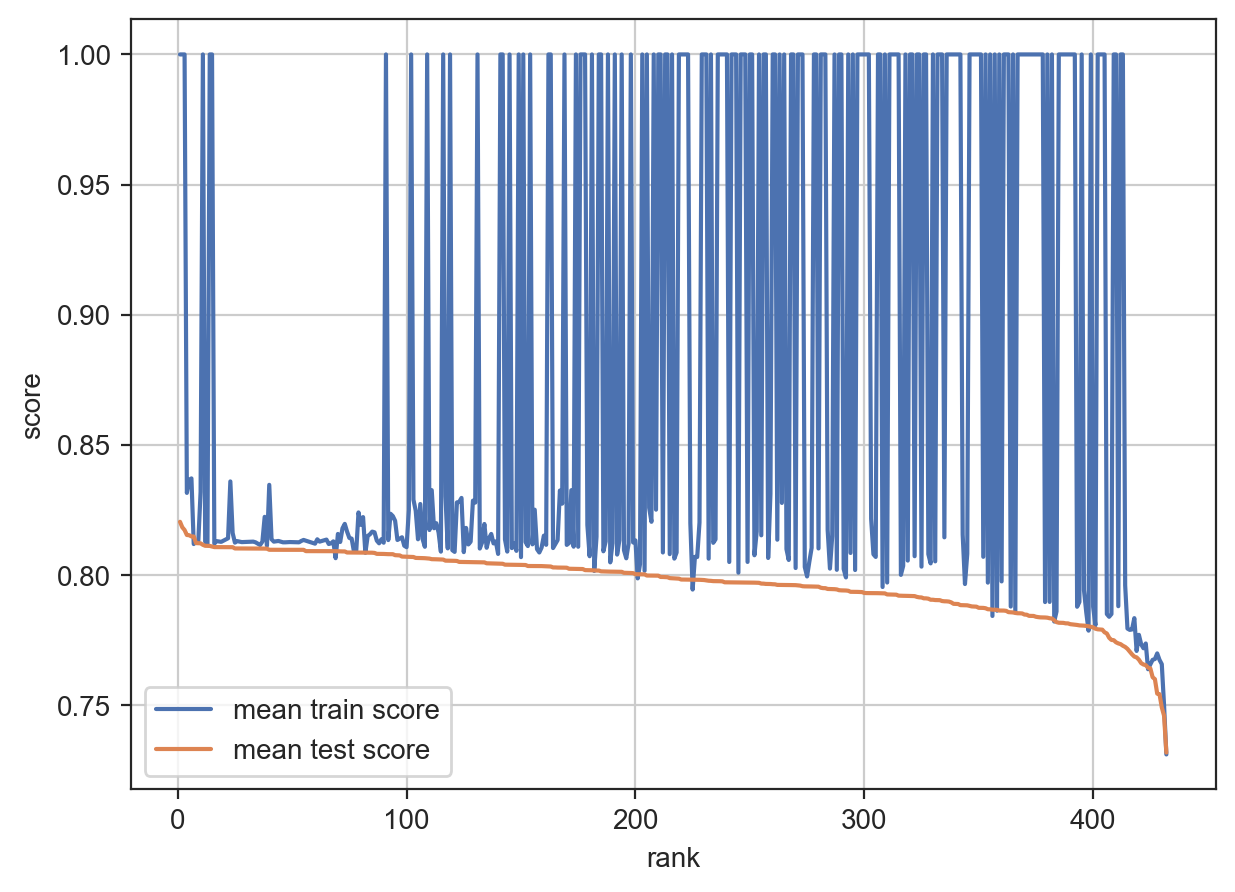

In [ ]:
fig,ax = plt.subplots(figsize=(7,5))
sns.lineplot(data=mlp_results,x='rank_test_score',y='mean_train_score',ax=ax,ci=None)
sns.lineplot(data=mlp_results,x='rank_test_score',y='mean_test_score',ax=ax,ci=None)
ax.legend(['mean train score','mean test score'])
ax.set_xlabel('rank')
ax.set_ylabel('score')
plt.grid(visible=True)

In [ ]:
winning_mlp = grid_search.best_estimator_

In [ ]:
winning_mlp

MLPClassifier(activation='logistic', alpha=0.01, early_stopping=True,
              hidden_layer_sizes=(150,), learning_rate='adaptive',
              max_iter=2000, solver='lbfgs')

In [ ]:
from sklearn.metrics import classification_report

y_pred_mlp = winning_mlp.predict(X_val_scale)
class_report_mlp = classification_report(y_val, y_pred_mlp)
print("\nClassification Report:")
print(class_report_mlp)


Classification Report:
              precision    recall  f1-score   support

           A       0.71      0.72      0.71       209
           H       0.80      0.80      0.80       302

    accuracy                           0.77       511
   macro avg       0.76      0.76      0.76       511
weighted avg       0.77      0.77      0.77       511



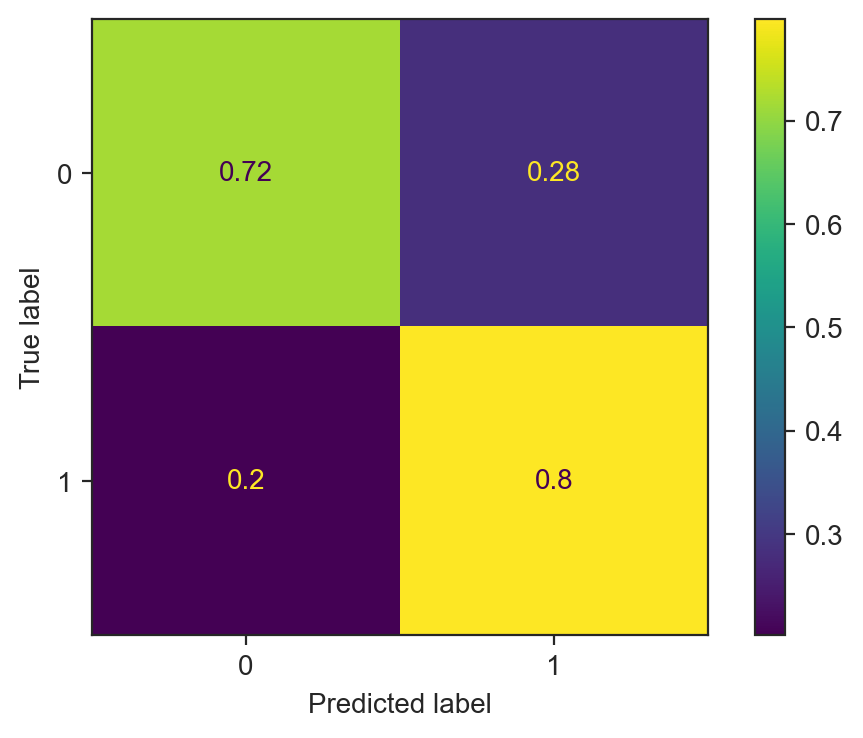

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,winning_mlp.predict(X_val_scale),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
# evaluate the model on your validation or test set

y_val_pred = winning_mlp.predict(X_val_scale)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.7651663405088063

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
len(pl.columns)

36

In [ ]:
pl.columns

Index(['FTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY',
       'HR', 'AR', 'AvgH', 'AvgD', 'AvgA', 'MaxH', 'MaxD', 'MaxA', 'MW',
       'Year', 'Max>2.5', 'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'TGD', 'Prob_D',
       'Elo_Before_Home', 'Elo_Before_Away', 'Days_D', 'form_diff', 'SP_diff',
       'Overall_diff', 'Attack_diff', 'Midfield_diff', 'Defence_diff'],
      dtype='object')

## **CNN**

### **Train_test_splitting the data**

In [ ]:
# from sklearn.model_selection import train_test_split


# X = pl.drop(columns=['WNW'])
# y = pl['WNW']

# # Split the data into training, validation, and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=42)

In [ ]:
#  len(X.columns)

### **scaling the data**

In [ ]:
norm_cols=['MW', 'Year','Overall_diff', 'Attack_diff',\
       'Midfield_diff', 'Defence_diff']

In [ ]:
std_cols = [col for col in X_train.columns if col not in norm_cols]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,Normalizer

In [ ]:
# Create transformers
stdscaling_transformer = StandardScaler()
normscaling_transformer = Normalizer()

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("std", stdscaling_transformer, std_cols),
        ("norm", normscaling_transformer, norm_cols)
    ],
    remainder='passthrough'
)

# Apply the transformations and convert back to a pandas DataFrame
X_train_scale = preprocessor.fit_transform(X_train)
X_train_scale = pd.DataFrame(X_train_scale, columns=std_cols + norm_cols)

In [ ]:
X_train_scale.head(5)

,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,...,Elo_Before_Away,Days_D,form_diff,SP_diff,MW,Year,Overall_diff,Attack_diff,Midfield_diff,Defence_diff
0,1.076889,-0.884041,0.629452,-0.844202,-0.445835,-1.340967,1.728802,-1.363751,-1.213270,-1.364168,...,-0.263236,0.096672,0.365047,1.177314,0.006951,0.999944,0.004468,0.003972,0.002979,0.004468
1,-0.354754,0.342697,0.629452,-0.056537,0.442787,-0.197848,-0.573957,0.110711,1.233651,-0.565926,...,1.257670,0.007231,-0.916341,-1.756945,0.008420,0.999947,-0.002476,-0.004457,-0.001981,-0.002476
2,-1.249532,1.978349,-0.728953,3.094119,-1.038250,0.373712,-1.231889,-0.257904,-1.213270,-0.565926,...,0.280108,0.096672,0.030564,0.003610,0.002981,0.999975,-0.002484,-0.003477,-0.003974,-0.002484
3,0.003156,-0.884041,0.289851,-0.056537,-0.445835,0.659492,-0.244992,1.216558,-0.397630,1.828799,...,0.234011,0.186113,-0.146502,0.003610,0.005464,0.999984,0.000000,0.000000,-0.000994,0.000497
4,-0.891621,-0.884041,-1.068554,-0.844202,-1.334458,0.087932,-0.573957,-0.626520,-0.397630,1.030557,...,0.332989,-0.171652,-0.153809,-0.583242,0.008910,0.999955,0.001485,0.001980,0.001980,0.000990


In [ ]:
X_val_scale = preprocessor.fit_transform(X_val)
X_val_scale = pd.DataFrame(X_val_scale, columns=std_cols + norm_cols)

X_val_scale.head(5)

,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,...,Elo_Before_Away,Days_D,form_diff,SP_diff,MW,Year,Overall_diff,Attack_diff,Midfield_diff,Defence_diff
0,-1.219631,0.310567,-1.070002,1.067193,1.461710,0.278484,-0.556609,1.877360,1.226440,0.195149,...,-0.636771,0.031127,-0.387001,-0.803081,0.012915,0.999916,0.000497,-0.000497,-0.000993,-0.000497
1,-0.864716,-0.280127,-1.773244,-0.094744,0.563953,0.816502,1.365197,-1.005678,0.420899,1.019289,...,0.100577,0.031127,0.023050,0.384307,0.004946,0.999983,-0.000495,0.001484,-0.001978,-0.001484
2,-1.042173,0.113669,-0.718381,0.679881,0.563953,0.547493,0.404294,0.796221,1.226440,1.843429,...,0.171171,0.031127,-0.064818,-1.990470,0.000992,0.999985,-0.002479,-0.002975,-0.002975,-0.002479
3,0.022573,0.901261,1.039725,0.292569,0.863205,1.354519,0.083993,0.435841,0.420899,1.019289,...,0.253941,0.031127,-0.136641,-0.605183,0.004460,0.999962,0.003469,0.003964,0.004460,0.002973
4,1.619692,-1.264617,0.336483,-0.869368,-0.333804,-0.259533,2.326100,-1.726438,-1.190183,0.195149,...,0.235121,0.119492,-0.023431,-0.258862,0.002472,0.999989,0.001977,0.002472,0.000494,0.002472


### **fitting the model**

In [ ]:
num_classes = 2

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Convert categorical target variables to integer labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

# Get the number of classes in the target variable
num_classes = len(label_encoder.classes_)

In [ ]:
from keras.callbacks import Callback

class LossCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"\nEpoch {epoch+1}/{self.params['epochs']} - ")

In [ ]:
X_train_scale.columns

Index(['HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR',
       'AR', 'AvgH', 'AvgD', 'AvgA', 'MaxH', 'MaxD', 'MaxA', 'Max>2.5',
       'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'TGD', 'Prob_D', 'Elo_Before_Home',
       'Elo_Before_Away', 'Days_D', 'form_diff', 'SP_diff', 'MW', 'Year',
       'Overall_diff', 'Attack_diff', 'Midfield_diff', 'Defence_diff'],
      dtype='object')

In [ ]:
X_train_cnn = np.expand_dims(X_train_scale, axis=-1)
X_val_cnn = np.expand_dims(X_val_scale, axis=-1)

In [ ]:
from keras.regularizers import l2
from keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import  make_scorer,f1_score,precision_score,recall_score

#  learning rate
custom_learning_rate = 0.001

# Initialize lists to store cross-validation results
cv_scores = []

# Define the number of splits for StratifiedKFold
n_splits = 5

# Create an instance of the custom callback
loss_callback = LossCallback()

# Initialize StratifiedKFold with SMOTE
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Iterate over the cross-validation folds
for train_idx, val_idx in skf.split(X_train_cnn, y_train_encoded):
    X_train_fold, X_val_fold = X_train_cnn[train_idx], X_train_cnn[val_idx]
    y_train_fold, y_val_fold = y_train_encoded[train_idx], y_train_encoded[val_idx]

    # Apply SMOTE to the training fold
    X_train_fold_reshaped = X_train_fold.reshape(X_train_fold.shape[0], -1)  # Flatten the 3D input data
    X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold_reshaped, y_train_fold)
    X_train_fold_resampled = X_train_fold_resampled.reshape(X_train_fold_resampled.shape[0], X_train_fold.shape[1], 1)  # Reshape back to 3D

    # Create and compile the model inside the loop (if you want to start fresh for each fold)
    model = keras.Sequential([
    # 1D convolutional layer with 32 filters and kernel size of 3
        layers.Conv1D(64, kernel_size=3, strides=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    # MaxPooling layer to downsample the data
        # layers.MaxPooling1D(pool_size=2),
        layers.AveragePooling1D(pool_size=2),
    # Dropout layer with a specified dropout rate
        layers.Dropout(0.1),
    # Flatten the data to prepare for the fully connected layers
        layers.Flatten(),
    # fully connected (dense) layer with 64 neurons, ReLU activation, and L2 regularization
        layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01)),  # Adjust the L2 regularization strength as needed
    # Dropout layer
        layers.Dropout(0.5),
    # output layer with the number of classes and softmax activation
        layers.Dense(num_classes, activation='softmax')

    ])

    # Use the Adam optimizer with the custom learning rate
    custom_optimizer = Adam(learning_rate=custom_learning_rate)

    model.compile(optimizer = custom_optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model for a fixed number of epochs
    history = model.fit(X_train_fold_resampled, y_train_fold_resampled, epochs=50, batch_size=64,
                        validation_data=(X_val_fold, y_val_fold),
                        callbacks=[loss_callback])

    # Training the model in the training set
    train_loss, train_acc = model.evaluate(X_val_fold, y_val_fold)



Epoch 1/50
16/31 [==============>...............] - ETA: 0s - loss: 1.5863 - accuracy: 0.6562 
Epoch 1/50 - 
31/31 [==============================] - 1s 10ms/step - loss: 1.4264 - accuracy: 0.6910 - val_loss: 1.0955 - val_accuracy: 0.7311
Epoch 2/50
15/31 [=============>................] - ETA: 0s - loss: 1.0051 - accuracy: 0.7437
Epoch 2/50 - 
31/31 [==============================] - 0s 4ms/step - loss: 0.9390 - accuracy: 0.7464 - val_loss: 0.7618 - val_accuracy: 0.7775
Epoch 3/50
16/31 [==============>...............] - ETA: 0s - loss: 0.7697 - accuracy: 0.7373
Epoch 3/50 - 
31/31 [==============================] - 0s 5ms/step - loss: 0.7277 - accuracy: 0.7479 - val_loss: 0.6286 - val_accuracy: 0.7824
Epoch 4/50
17/31 [===============>..............] - ETA: 0s - loss: 0.6259 - accuracy: 0.7675
Epoch 4/50 - 
31/31 [==============================] - 0s 4ms/step - loss: 0.6205 - accuracy: 0.7655 - val_loss: 0.5671 - val_accuracy: 0.7873
Epoch 5/50
16/31 [==============>...............] 

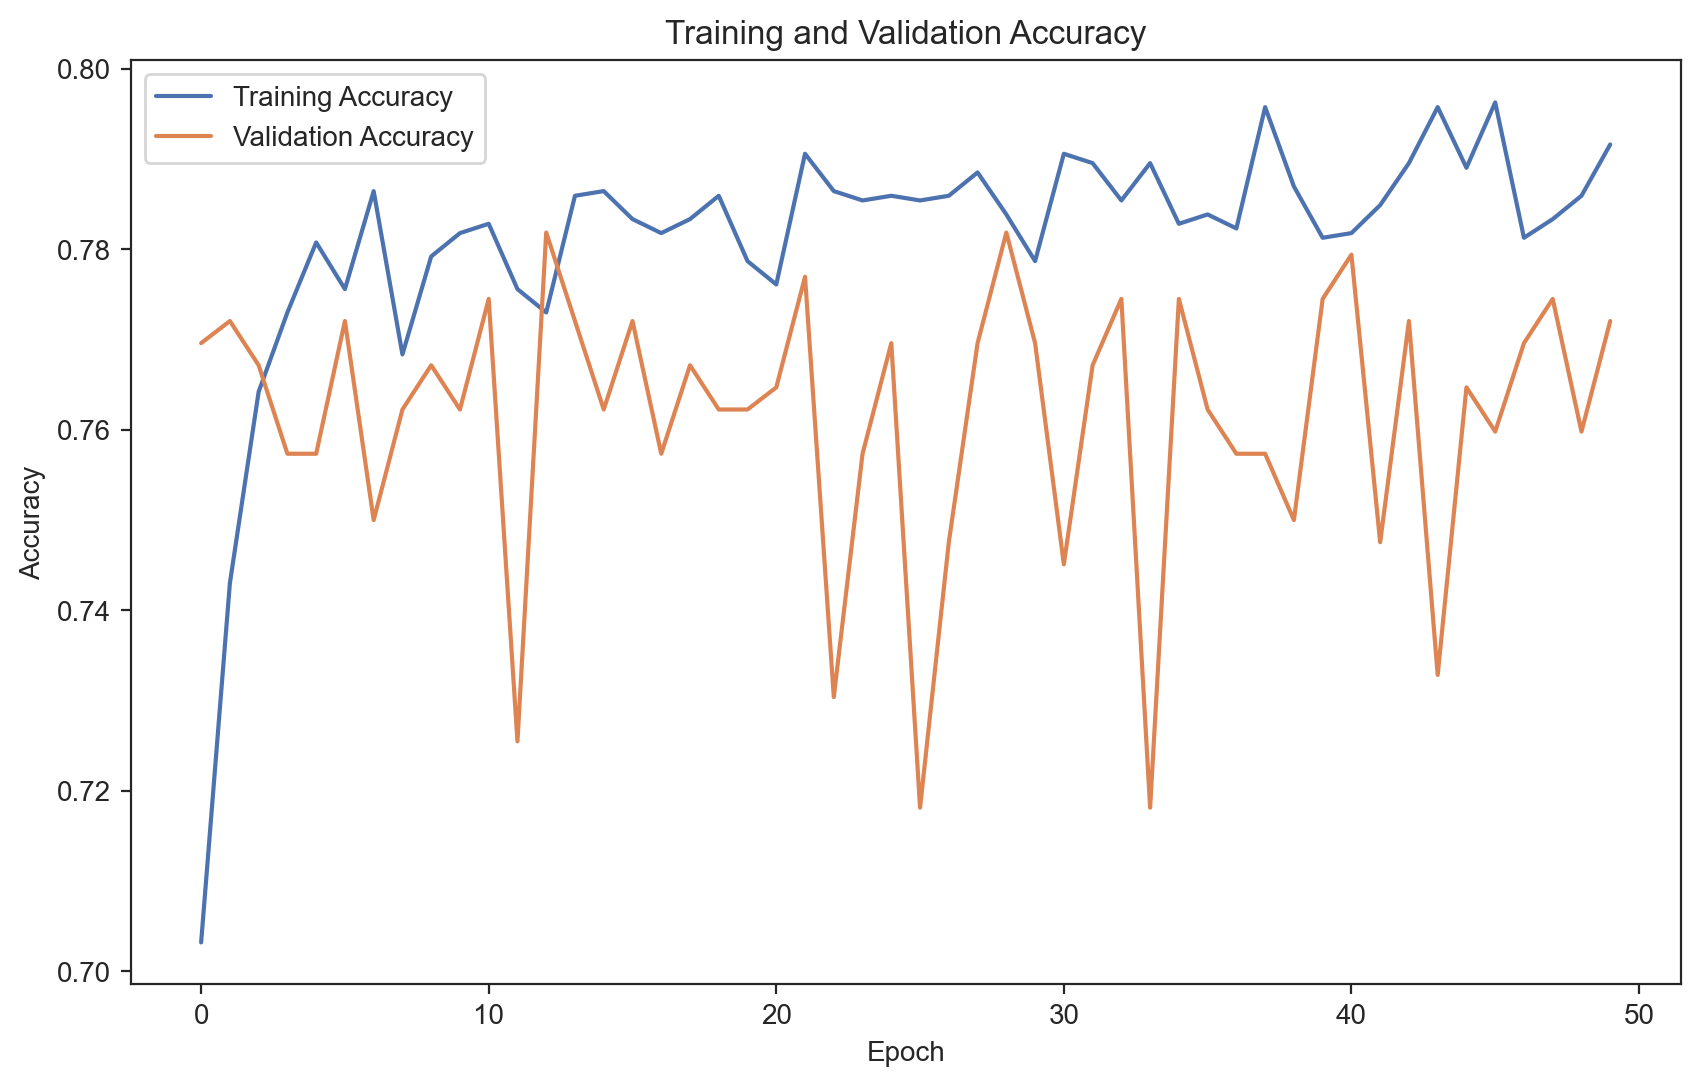

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import numpy as np

# Convert the Pandas DataFrame to a NumPy array
X_val_scale_array = X_val_scale.values

# Reshape the NumPy array to add the channel dimension
X_val_scale_reshaped = X_val_scale_array.reshape(X_val_scale_array.shape[0], X_val_scale_array.shape[1], 1)


In [ ]:
# Evaluate the model on the validation set
valid_loss, valid_acc = model.evaluate(X_val_scale_reshaped, y_val_encoded)

16/16 [==============================] - 0s 2ms/step - loss: 0.4947 - accuracy: 0.7789


In [ ]:
from sklearn.metrics import classification_report
# Convert probabilities to class labels
y_pred_cnn = model.predict(X_val_scale_reshaped);
y_pred_cnn_labels = np.argmax(y_pred_cnn, axis=1)

# Now, you can use classification_report with discrete class labels
class_report_cnn = classification_report(y_val_encoded, y_pred_cnn_labels)
print("\nClassification Report:")
print(class_report_cnn)


16/16 [==============================] - 0s 2ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       209
           1       0.82      0.80      0.81       302

    accuracy                           0.78       511
   macro avg       0.77      0.77      0.77       511
weighted avg       0.78      0.78      0.78       511



16/16 [==============================] - 0s 2ms/step


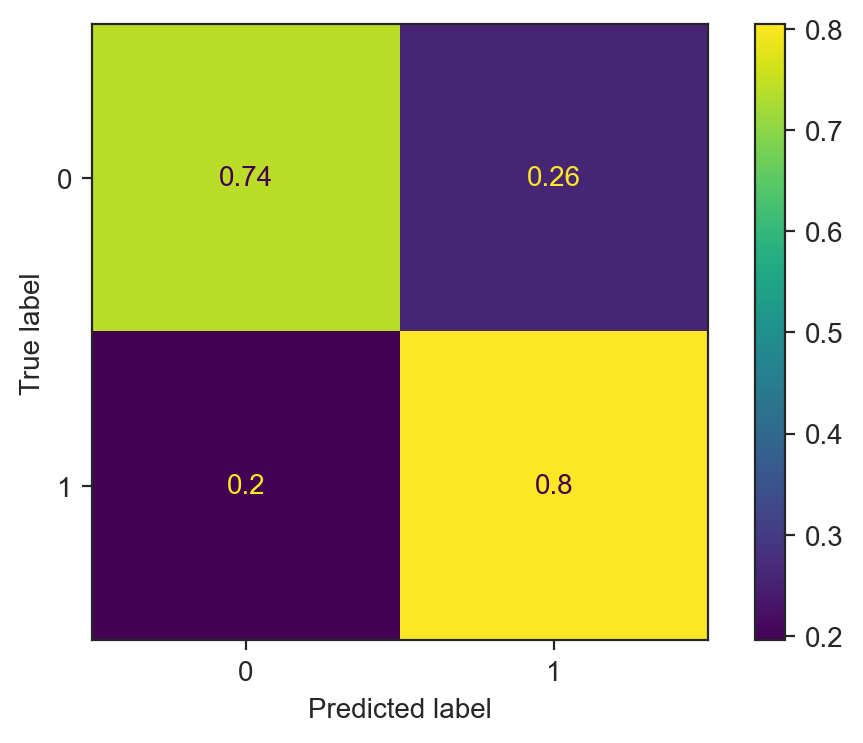

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val_encoded,np.argmax(model.predict(X_val_scale_reshaped), axis=1),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();